In [ ]:
1. Distribution of Reviews per User
Descriptive Analysis: Study the distribution of the number of reviews (nbr_ratings) per user to see how they are distributed.
Box plot per user by country: Compare the distribution of reviews between users from different countries.
Top reviewers: Identify the users with the highest number of reviews.
2. Analysis of User Distribution by Location
User count per country: Check which countries have the highest number of registered users.
Geographic distribution: Create a map or visualization showing the distribution of users by country.
Country comparison: Compare the average nbr_ratings per country to see in which countries users are most active.
3. Temporal Analysis of User Registrations
Registration trends over time: Study how the number of new registrations changes over time using the joined_date column.
Annual/monthly registrations: Create charts to show how registrations vary year by year or month by month.
Country comparison by registration year: Examine if there were specific periods when there were peaks in registrations in certain countries.
4. Relationship Between Number of Reviews and Year of Registration
Correlation analysis: Check if there is a relationship between the registration year (joined_date) and the number of reviews (nbr_ratings).
Average reviews per registration year: Examine if users who joined in certain years tend to write more reviews compared to others.
5. Analysis of Country Popularity
Most active users by country: Identify the countries with the most active users (in terms of nbr_ratings).
Distribution of reviews by country: Show the distribution of the number of reviews per user in each country.
Comparison by continents: Group countries by continent and compare the number of reviews across continents.
6. Analysis of User Activity
Top 10 most active users: Find the users with the highest number of reviews and analyze their statistics.
Review distribution by username: See if there are significant differences between users with more or fewer reviews.
Reviews over time: Check if users tend to write more reviews soon after registering or spread their reviews evenly over time (if you have access to review timestamps).

8. User Segmentation
User clustering: Use clustering techniques to divide users into groups based on nbr_ratings, joined_date, and location to identify common patterns.
Analysis by demographic groups: If there is additional information (such as age, in extended datasets), conduct demographic segmentation.
9. Popularity and Growth Trends
Community growth analysis: Study how the community has grown over time in terms of new users and reviews per year.
Trend prediction: Use machine learning models to predict how the number of registrations or reviews will evolve.
10. Advanced Visualizations
Choropleth map: Create a map that visually shows the number of users per country.
Interactive charts: Use tools like Plotly to make charts interactive, allowing deeper data exploration.

In [149]:
import numpy as np
import pandas as pd
import os

users_RB = pd.read_csv('data/birre/RateBeer/users.csv')
users_BA = pd.read_csv('data/birre/BeerAdvocate/users.csv')

users_RB.head()

,nbr_ratings,user_id,user_name,joined,location
0,1890,175852,Manslow,1.337508e+09,Poland
1,89,442761,MAGICuenca91,1.484046e+09,Spain
2,169,288889,Sibarh,1.384600e+09,Poland
3,3371,250510,fombe89,1.363950e+09,Spain
4,13043,122778,kevnic2008,1.296644e+09,Germany


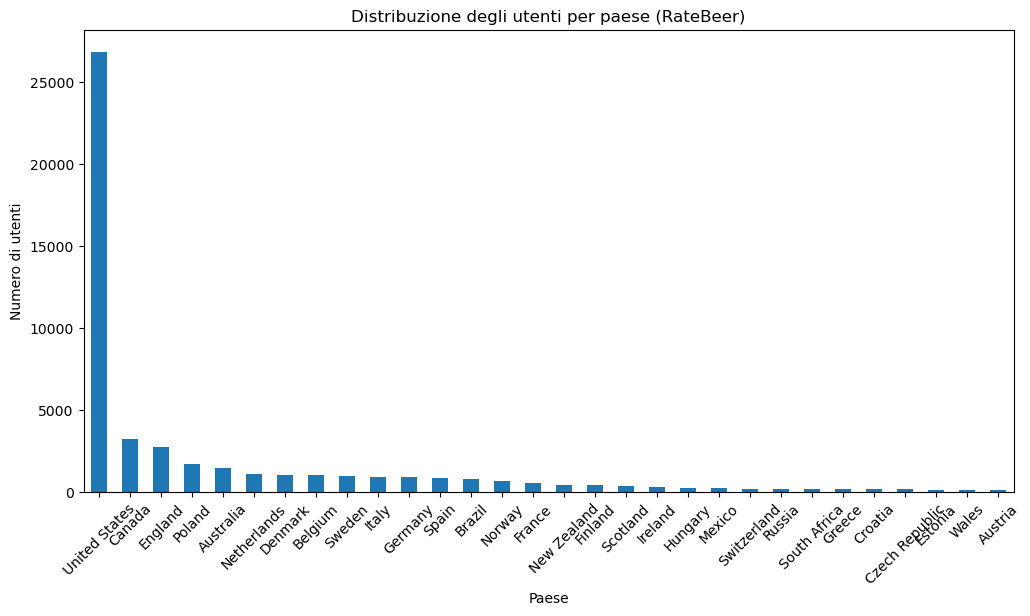

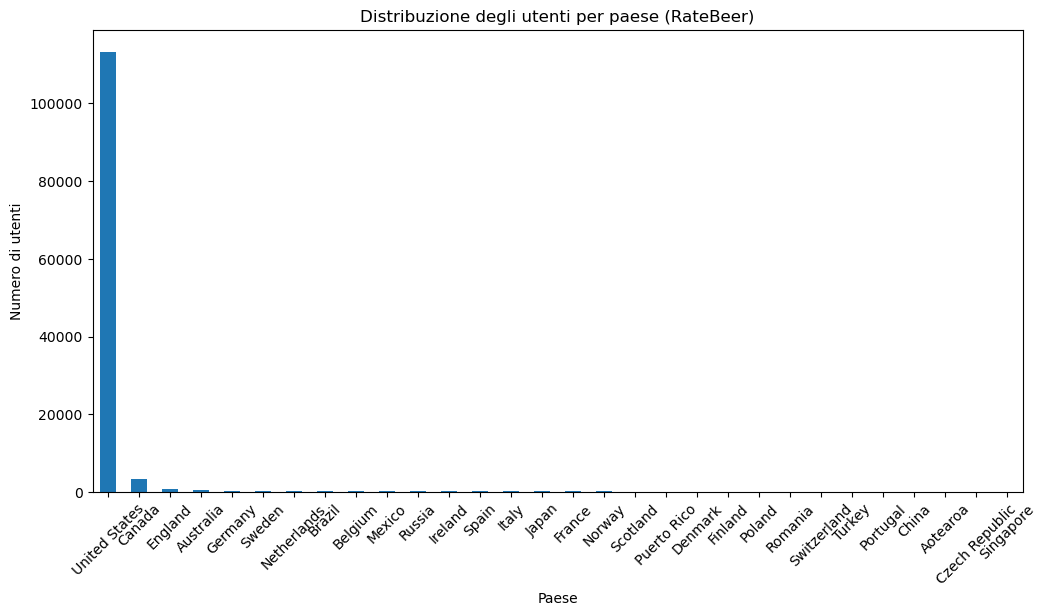

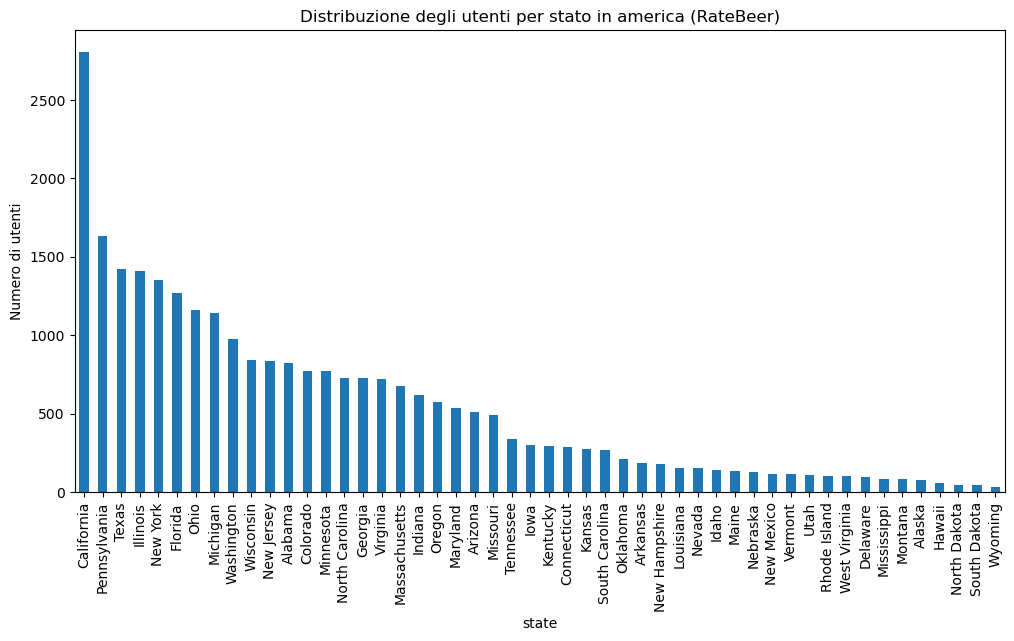

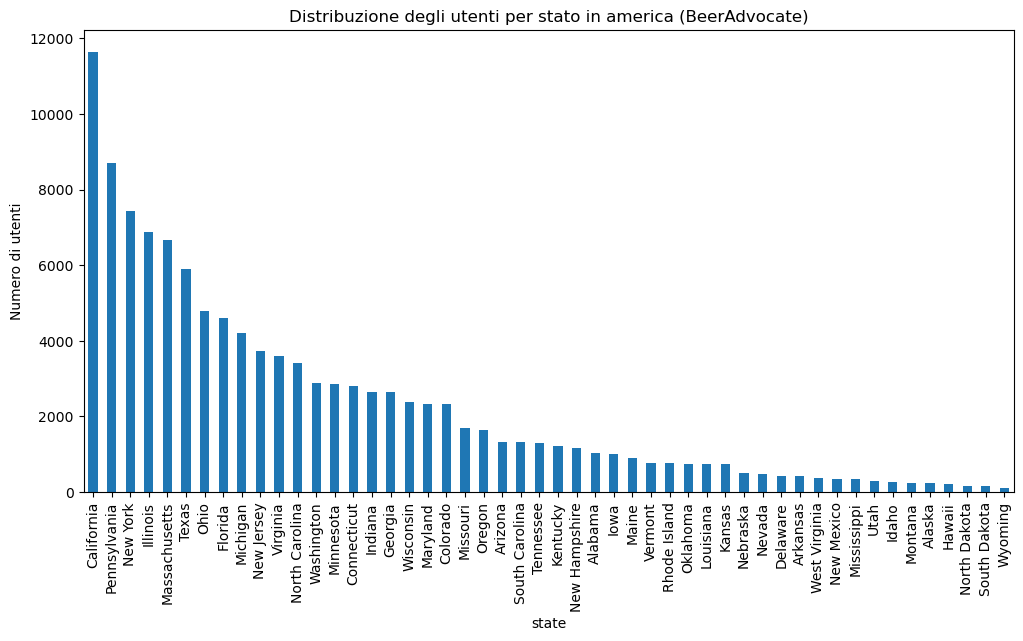

In [150]:
import pandas as pd
import matplotlib.pyplot as plt
def extract_state_and_update(row):
    # Verifica se la location è una stringa valida
    if isinstance(row['location'], str):
        # Controlla se la location contiene "United States"
        if 'United States' in row['location']:
            
            parts = row['location'].split(', ')
            # Imposta location a "United States"
            row['location'] = 'United States'  
            # Estrai lo stato se esiste
            row['state'] = parts[1] if len(parts) > 1 else None
             # Stampa di debug
        else:
            row['state'] = None  # Imposta lo stato a None se la location non è "United States"
    else:
        row['location'] = None  # Imposta a None se la location non è una stringa
        row['state'] = None  # Imposta lo stato a None
    return row

# Applicare la funzione ai DataFrame
users_RB = users_RB.apply(extract_state_and_update, axis=1)
users_BA = users_BA.apply(extract_state_and_update, axis=1)

top_countries_RB = users_RB['location'].value_counts().head(30)

# Creazione del grafico a barre per i primi 30 paesi
top_countries_RB.plot(kind='bar', title='Distribuzione degli utenti per paese (RateBeer)', figsize=(12, 6))
plt.xlabel('Paese')
plt.ylabel('Numero di utenti')
plt.xticks(rotation=45)  # Ruota le etichette sull'asse x per una migliore leggibilità
plt.show()
top_countries_BA = users_BA['location'].value_counts().head(30)

# Creazione del grafico a barre per i primi 30 paesi
top_countries_BA.plot(kind='bar', title='Distribuzione degli utenti per paese (RateBeer)', figsize=(12, 6))
plt.xlabel('Paese')
plt.ylabel('Numero di utenti')
plt.xticks(rotation=45)  # Ruota le etichette sull'asse x per una migliore leggibilità
plt.show()
# Verifica il numero di righe con location 'United States'
users_RB['state'].value_counts().plot(kind='bar', title='Distribuzione degli utenti per stato in america (RateBeer)', figsize=(12, 6))
plt.xlabel('state')
plt.ylabel('Numero di utenti')
plt.show()
users_BA['state'].value_counts().plot(kind='bar', title='Distribuzione degli utenti per stato in america (BeerAdvocate)', figsize=(12, 6))
plt.xlabel('state')
plt.ylabel('Numero di utenti')
plt.show()



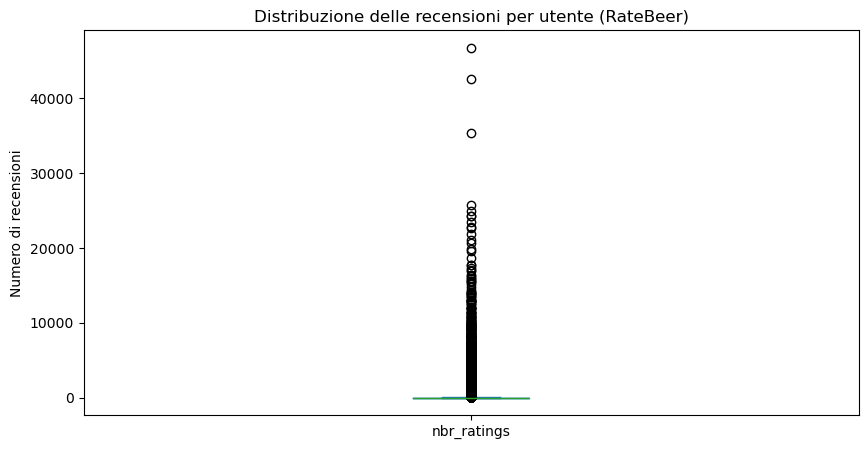

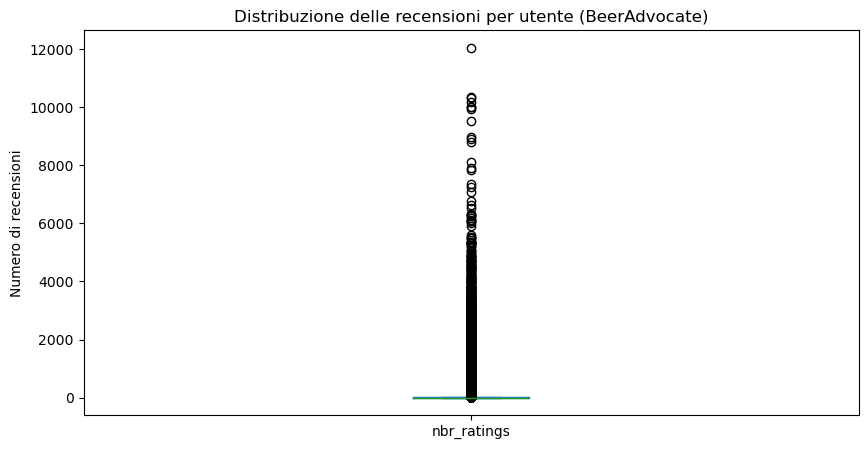

In [152]:
# Box plot per le recensioni (RateBeer)
plt.figure(figsize=(10, 5))
users_RB['nbr_ratings'].plot(kind='box', title='Distribuzione delle recensioni per utente (RateBeer)')
plt.ylabel('Numero di recensioni')
plt.show()

# Box plot per le recensioni (BeerAdvocate)
plt.figure(figsize=(10, 5))
users_BA['nbr_ratings'].plot(kind='box', title='Distribuzione delle recensioni per utente (BeerAdvocate)')
plt.ylabel('Numero di recensioni')
plt.show()


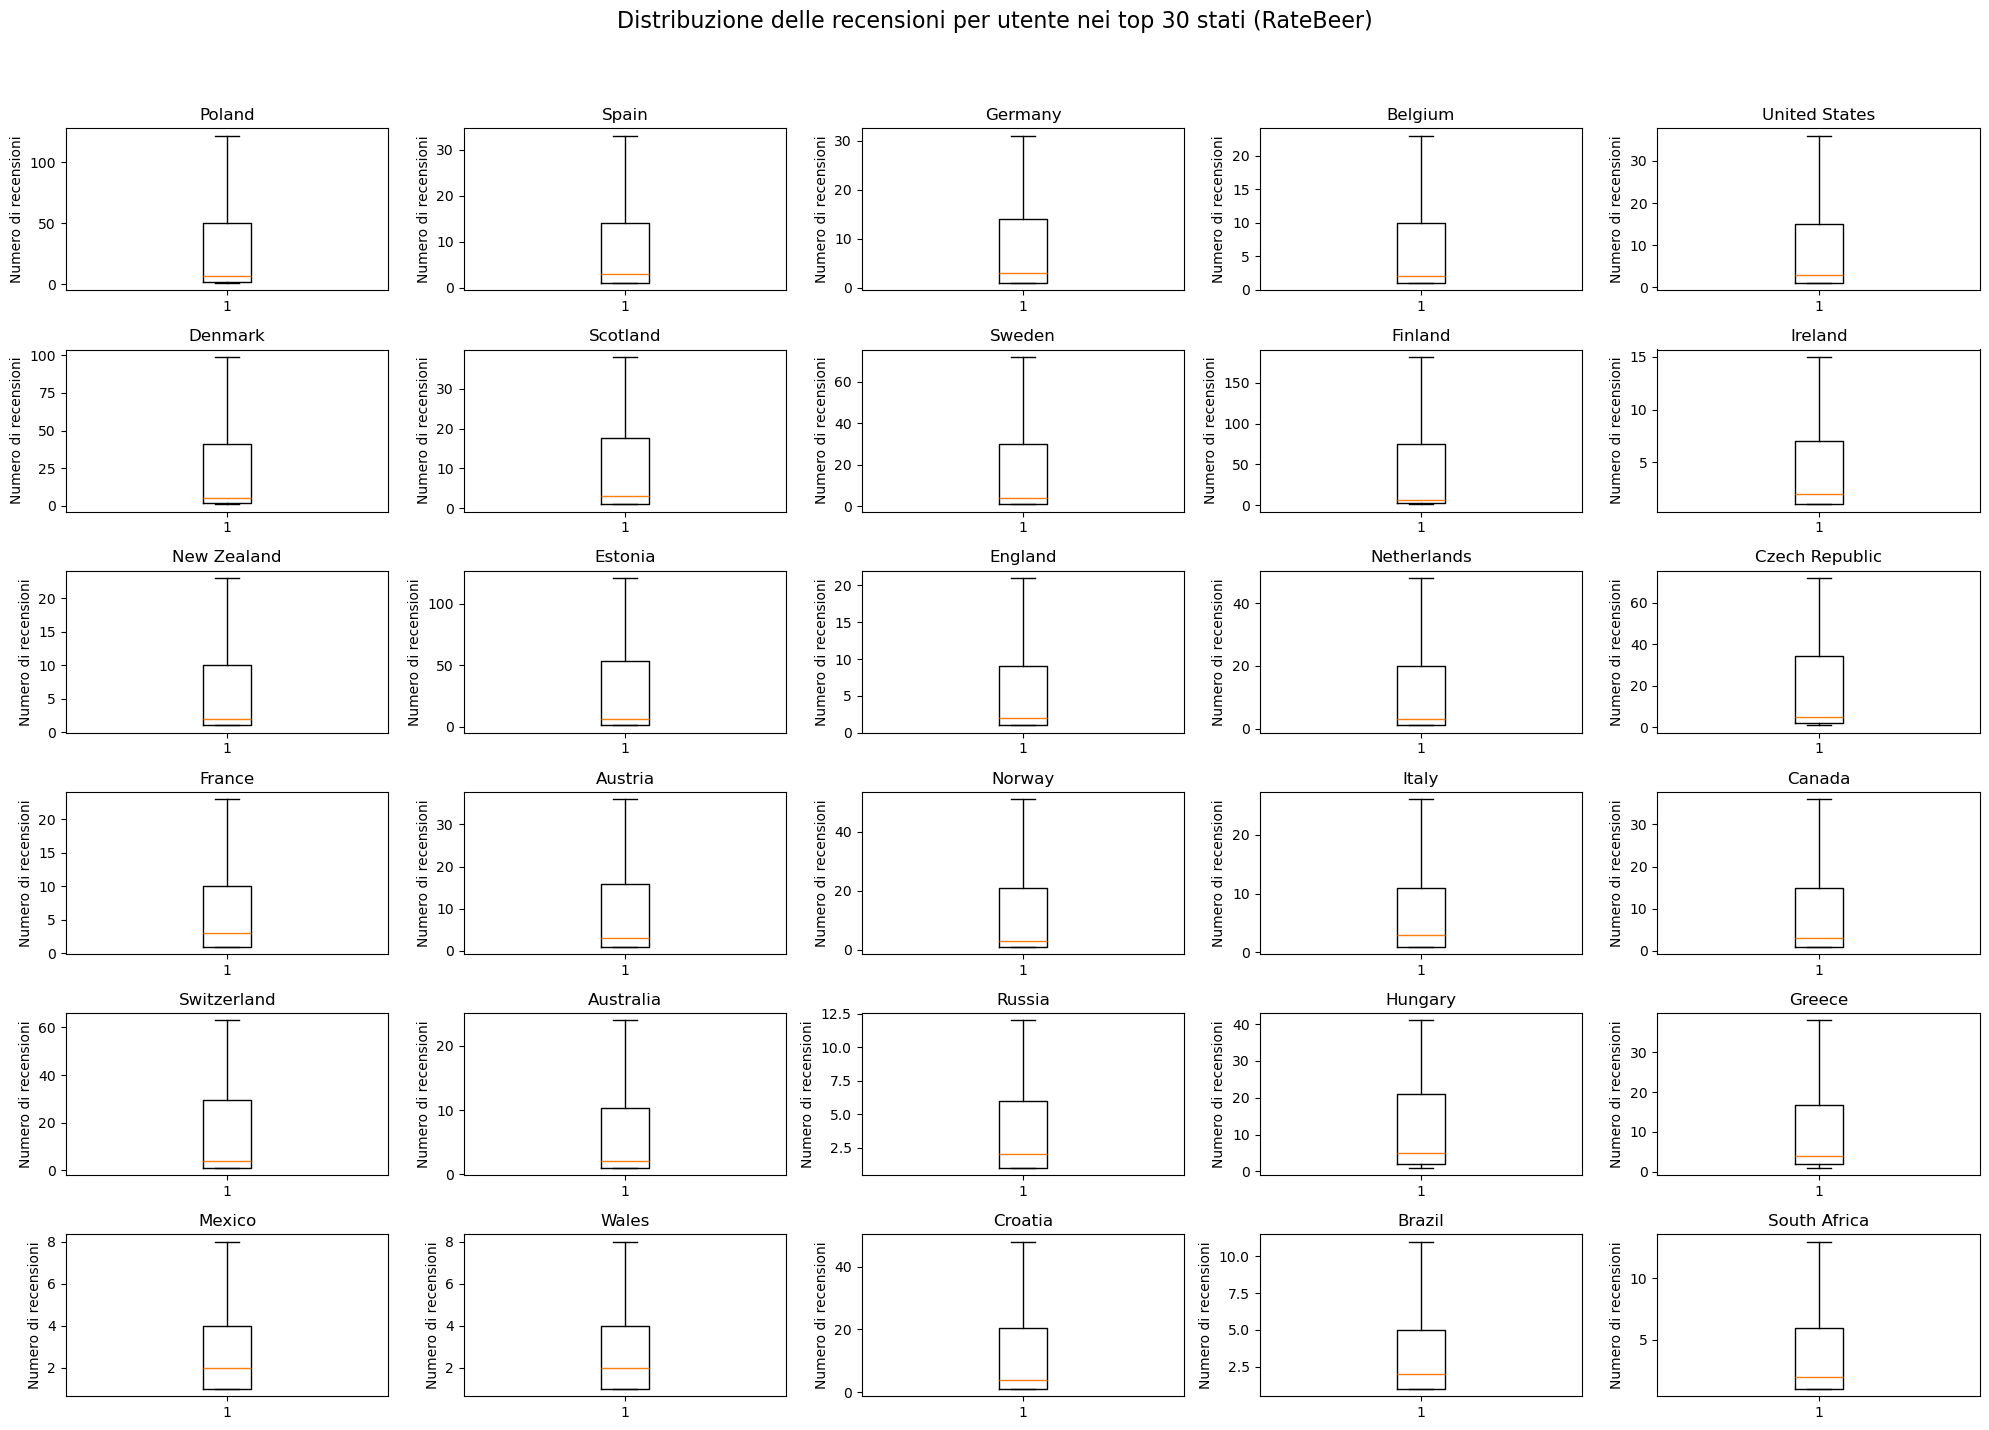

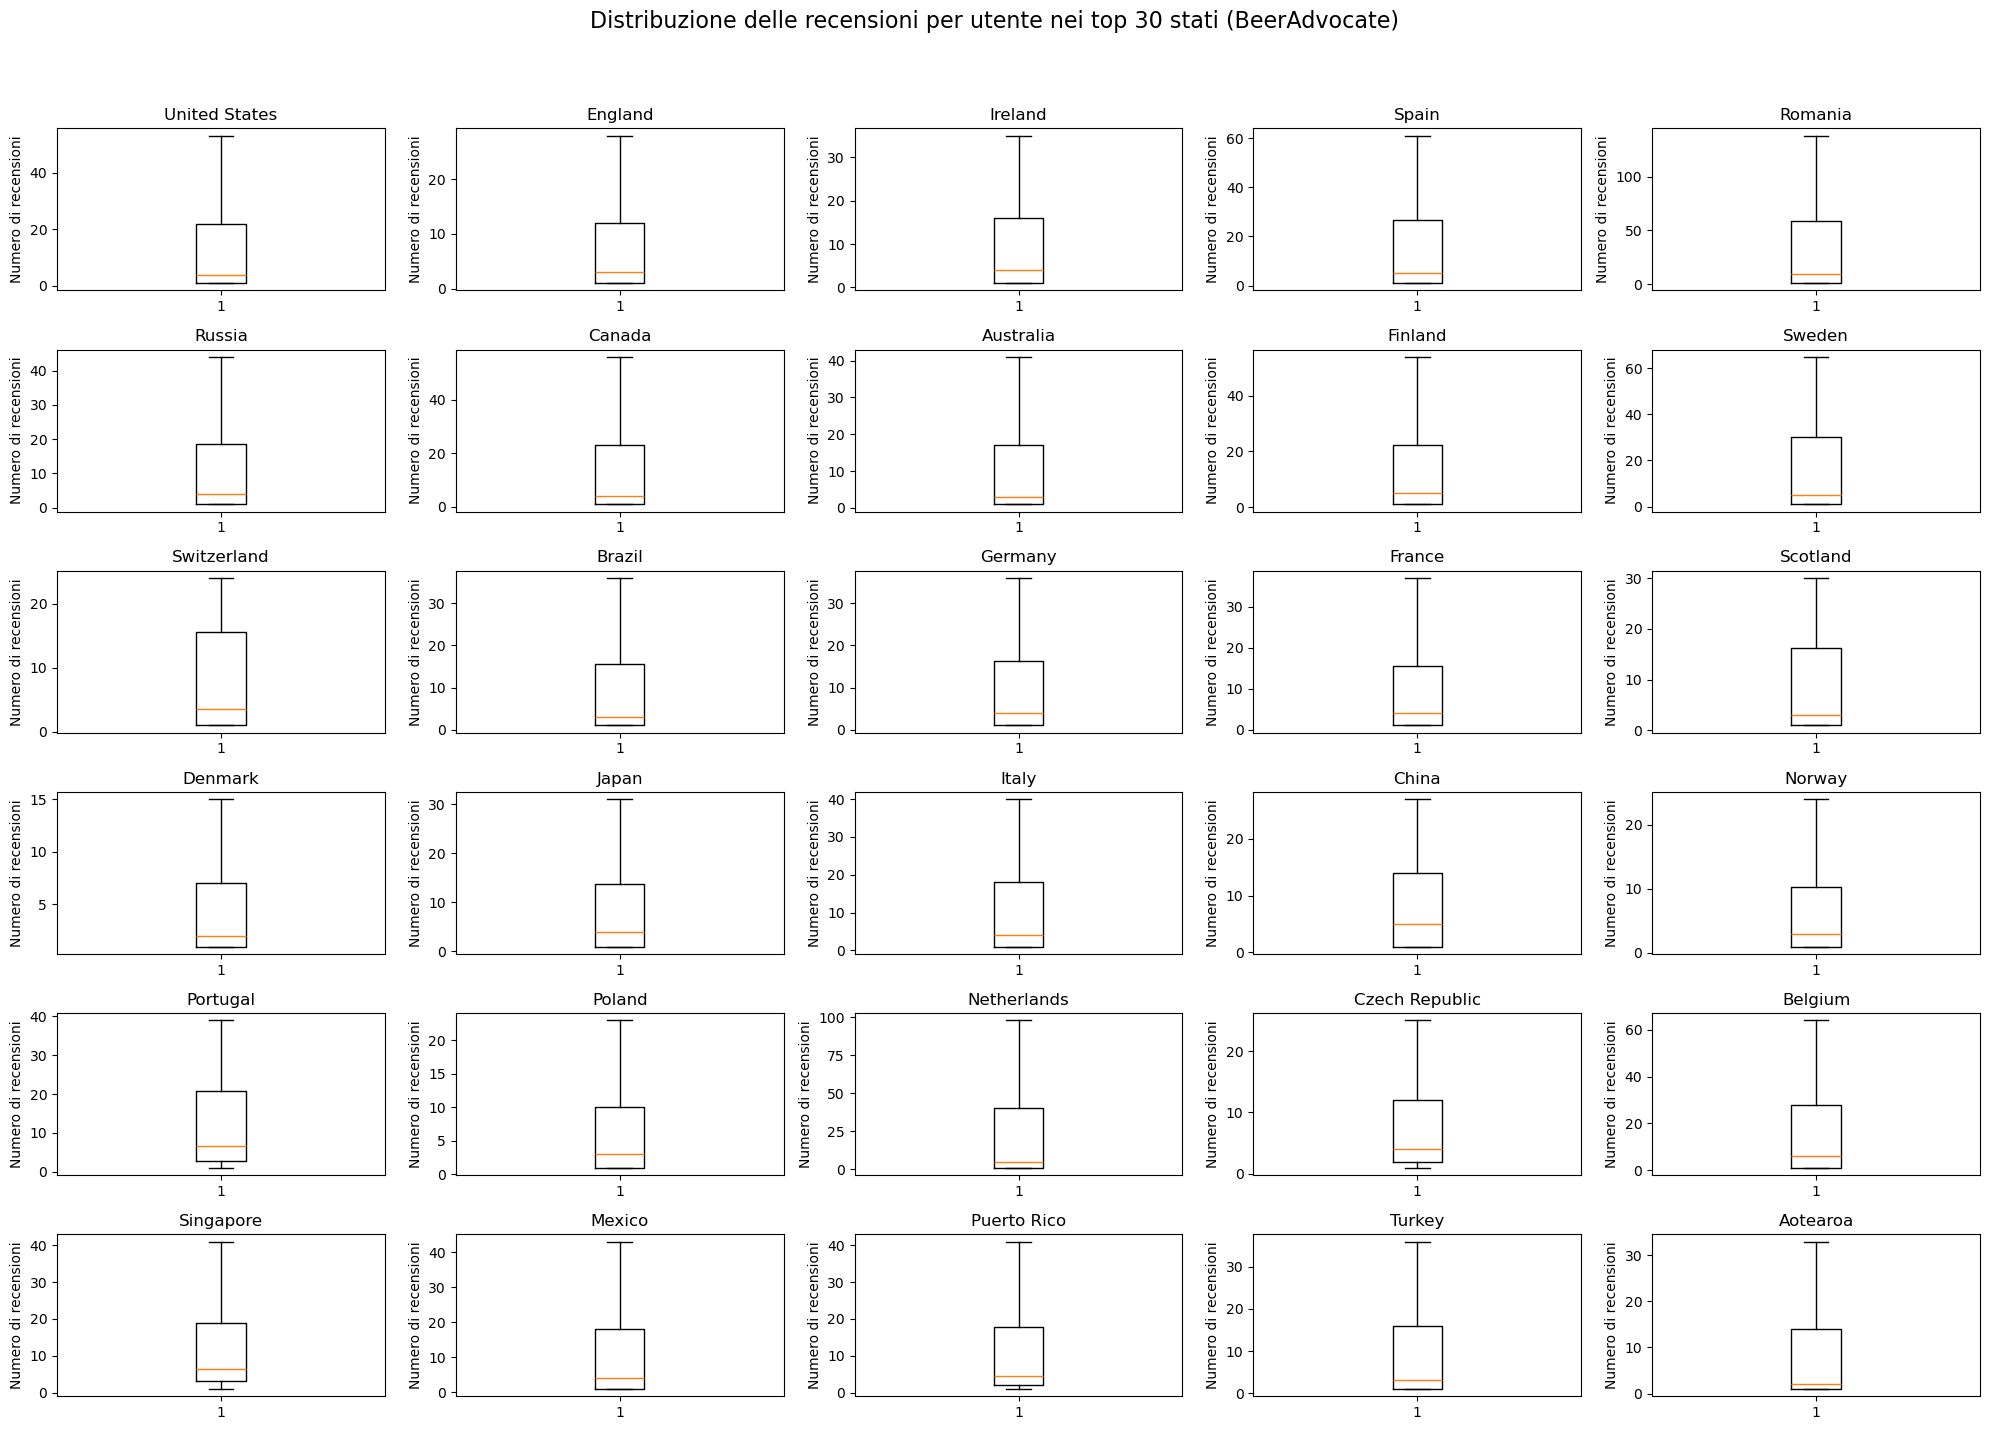

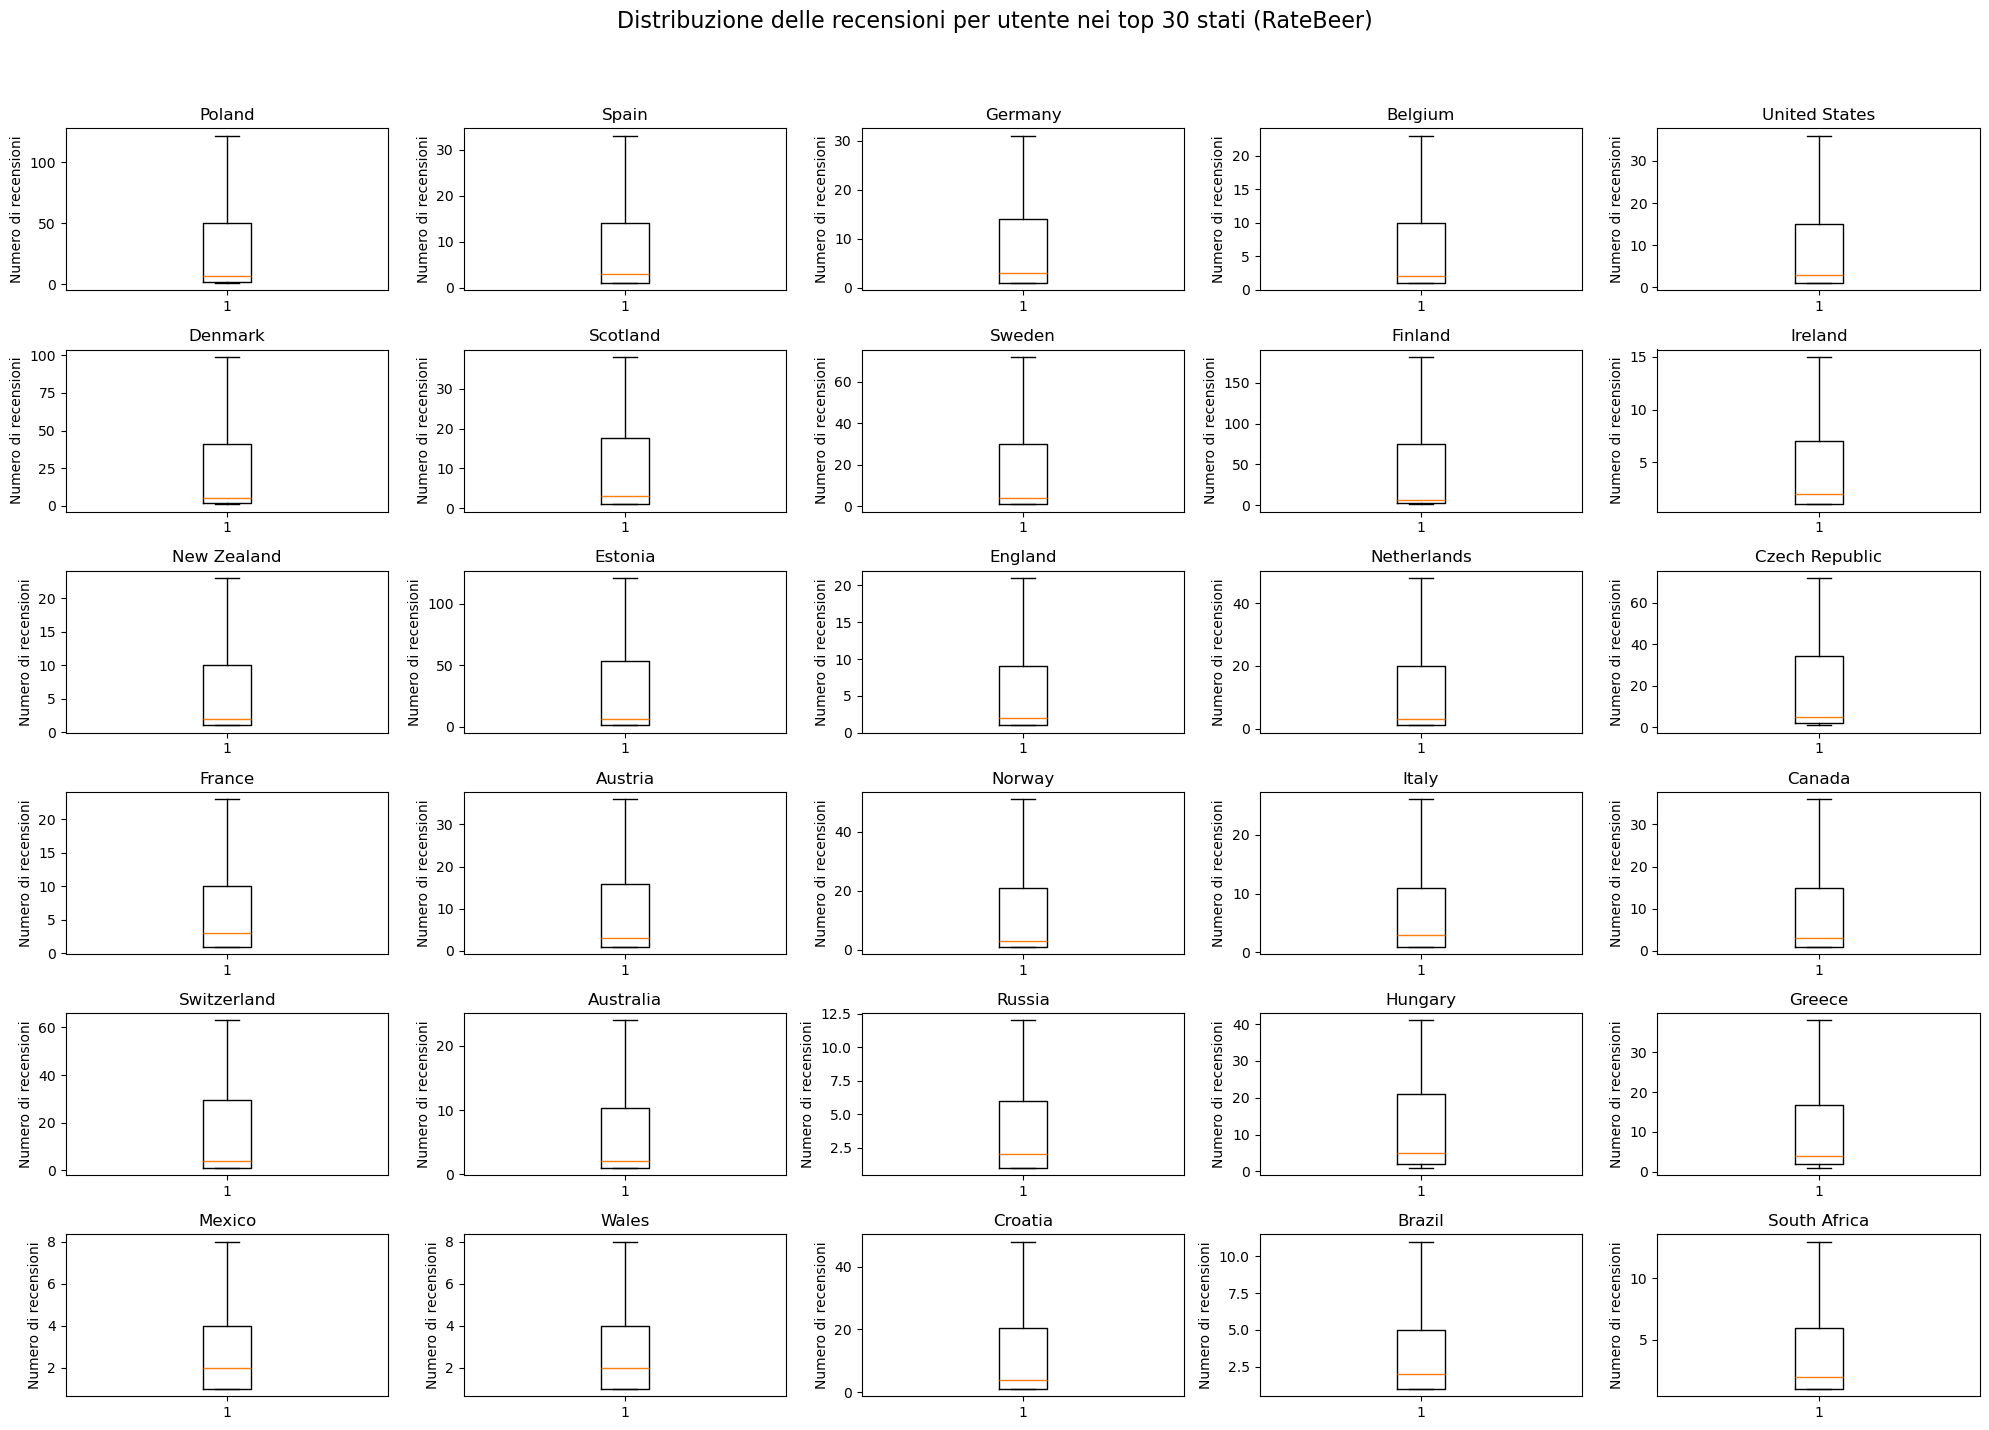

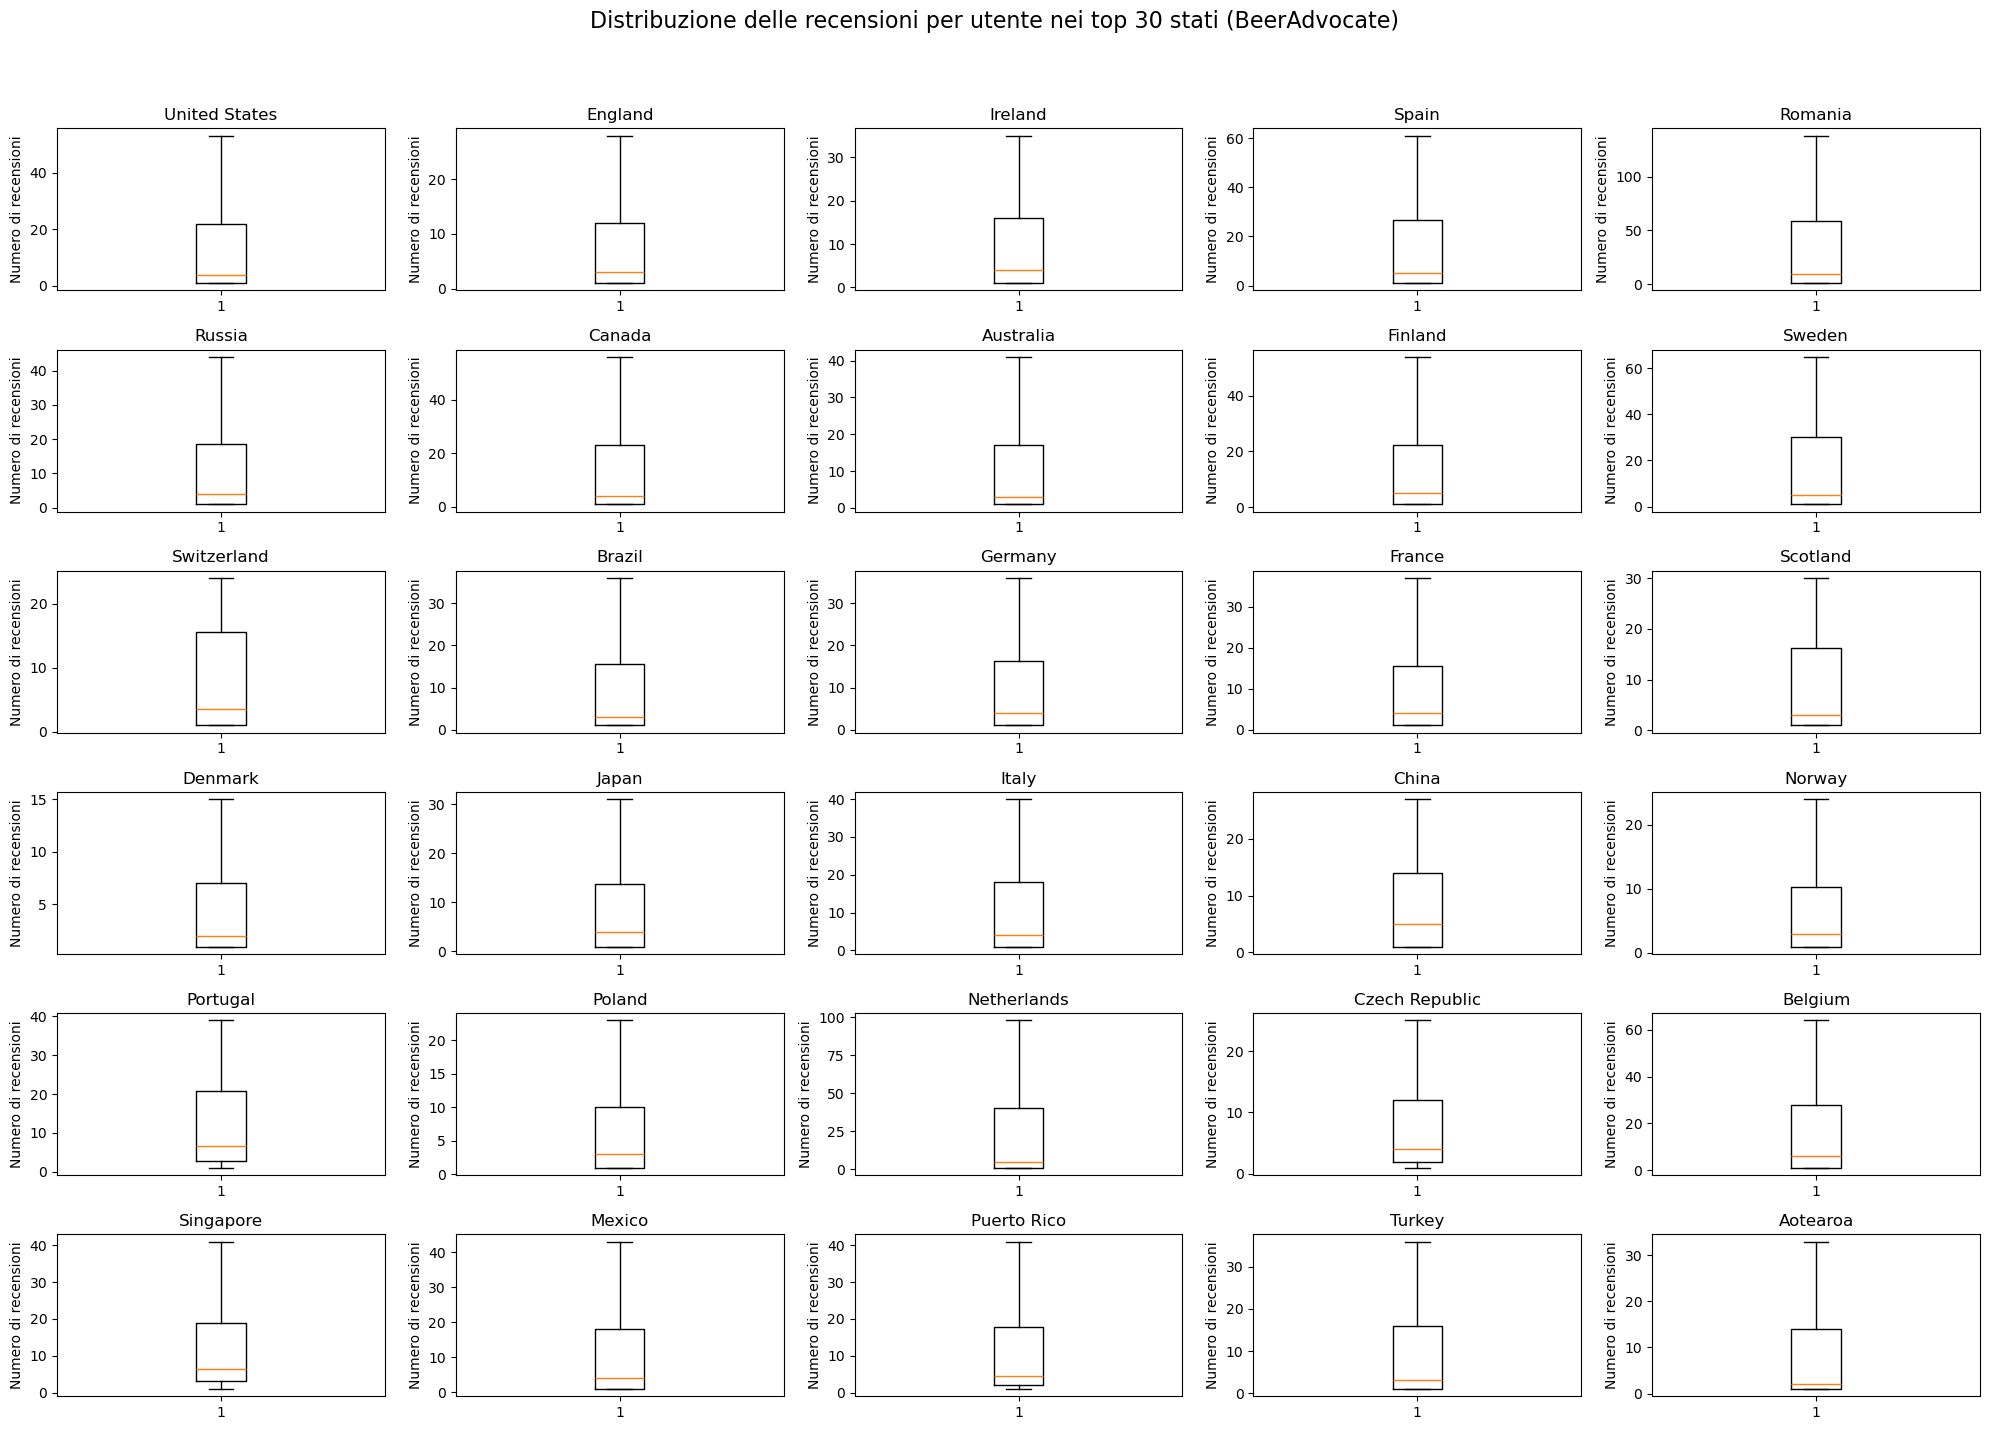

In [153]:

import matplotlib.pyplot as plt
import pandas as pd

# Supponiamo che `users_RB` e `users_BA` siano già stati caricati e preparati
# Eseguiamo la selezione dei top 30 stati per numero di recensioni

# Per RateBeer
top_states_RB = users_RB.groupby('location')['nbr_ratings'].count().nlargest(30).index
filtered_RB = users_RB[users_RB['location'].isin(top_states_RB)]

# Per BeerAdvocate
top_states_BA = users_BA.groupby('location')['nbr_ratings'].count().nlargest(30).index
filtered_BA = users_BA[users_BA['location'].isin(top_states_BA)]

# Funzione per creare subplot 6x5 per un sito
# Funzione per creare subplot 6x5 per un sito
def plot_boxplots(data, title):
    fig, axes = plt.subplots(6, 5, figsize=(20, 15))
    axes = axes.flatten()
    
    for i, state in enumerate(data['location'].unique()):
        subset = data[data['location'] == state]  # Correzione: usa 'state'
        axes[i].boxplot(subset['nbr_ratings'], showfliers=False)
        axes[i].set_title(state)  # Correzione: usa 'state'
        axes[i].set_ylabel('Numero di recensioni')
    
    # Rimuovi eventuali assi non utilizzati
    for j in range(len(data['location'].unique()), len(axes)):
        fig.delaxes(axes[j])
        
    plt.suptitle(title, fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Creazione dei box plot per RateBeer
plot_boxplots(filtered_RB, 'Distribuzione delle recensioni per utente nei top 30 stati (RateBeer)')

# Creazione dei box plot per BeerAdvocate
plot_boxplots(filtered_BA, 'Distribuzione delle recensioni per utente nei top 30 stati (BeerAdvocate)')

# Creazione dei box plot per RateBeer
plot_boxplots(filtered_RB, 'Distribuzione delle recensioni per utente nei top 30 stati (RateBeer)')

# Creazione dei box plot per BeerAdvocate
plot_boxplots(filtered_BA, 'Distribuzione delle recensioni per utente nei top 30 stati (BeerAdvocate)')


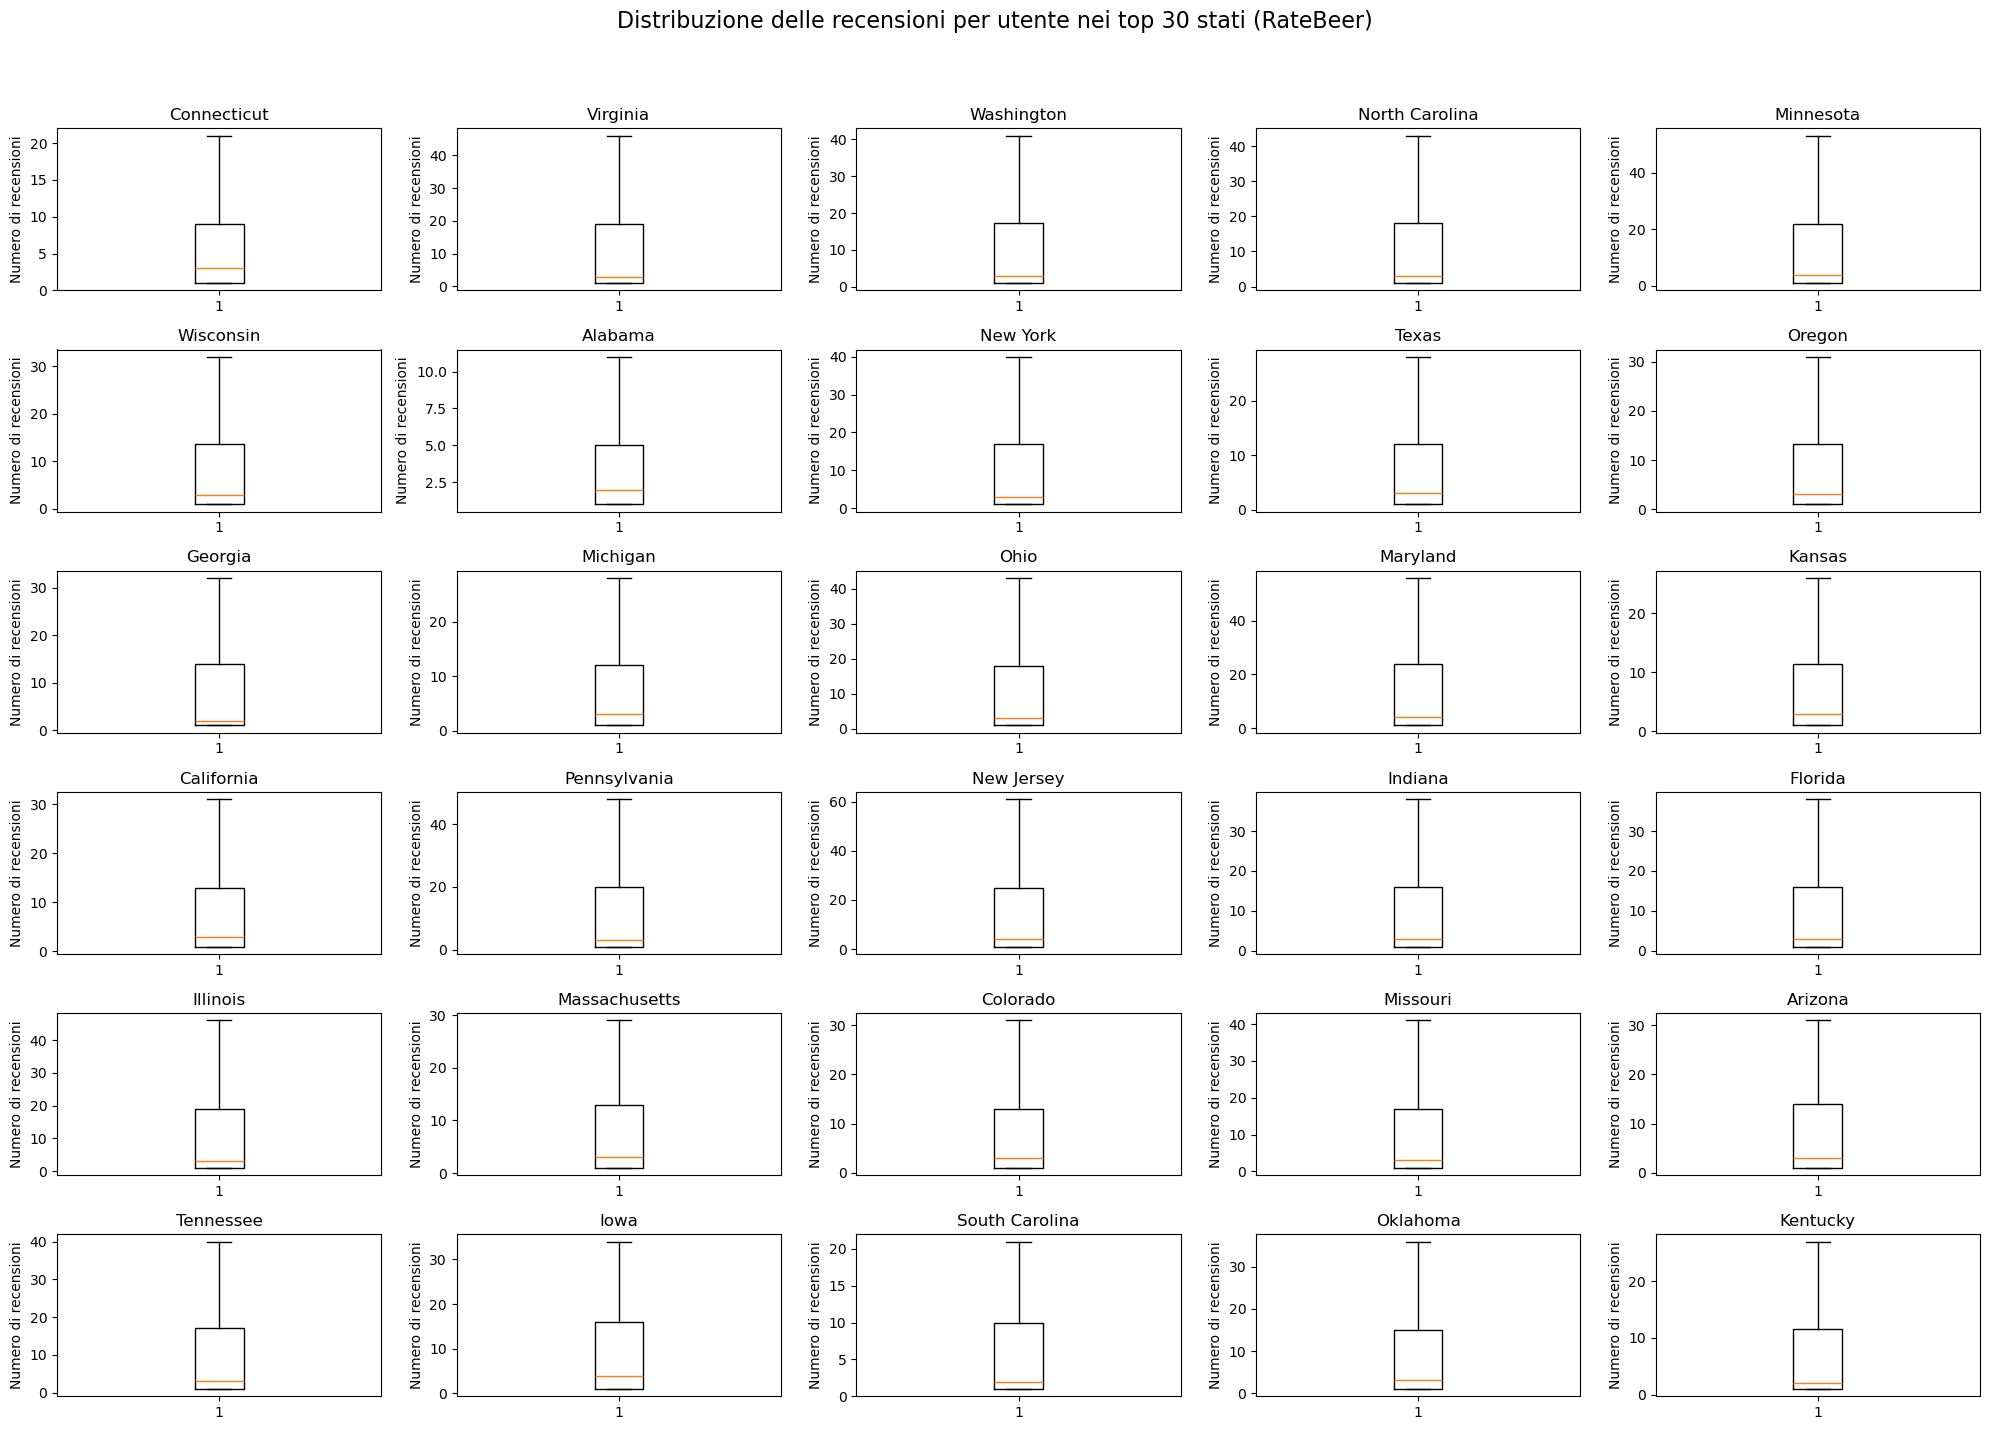

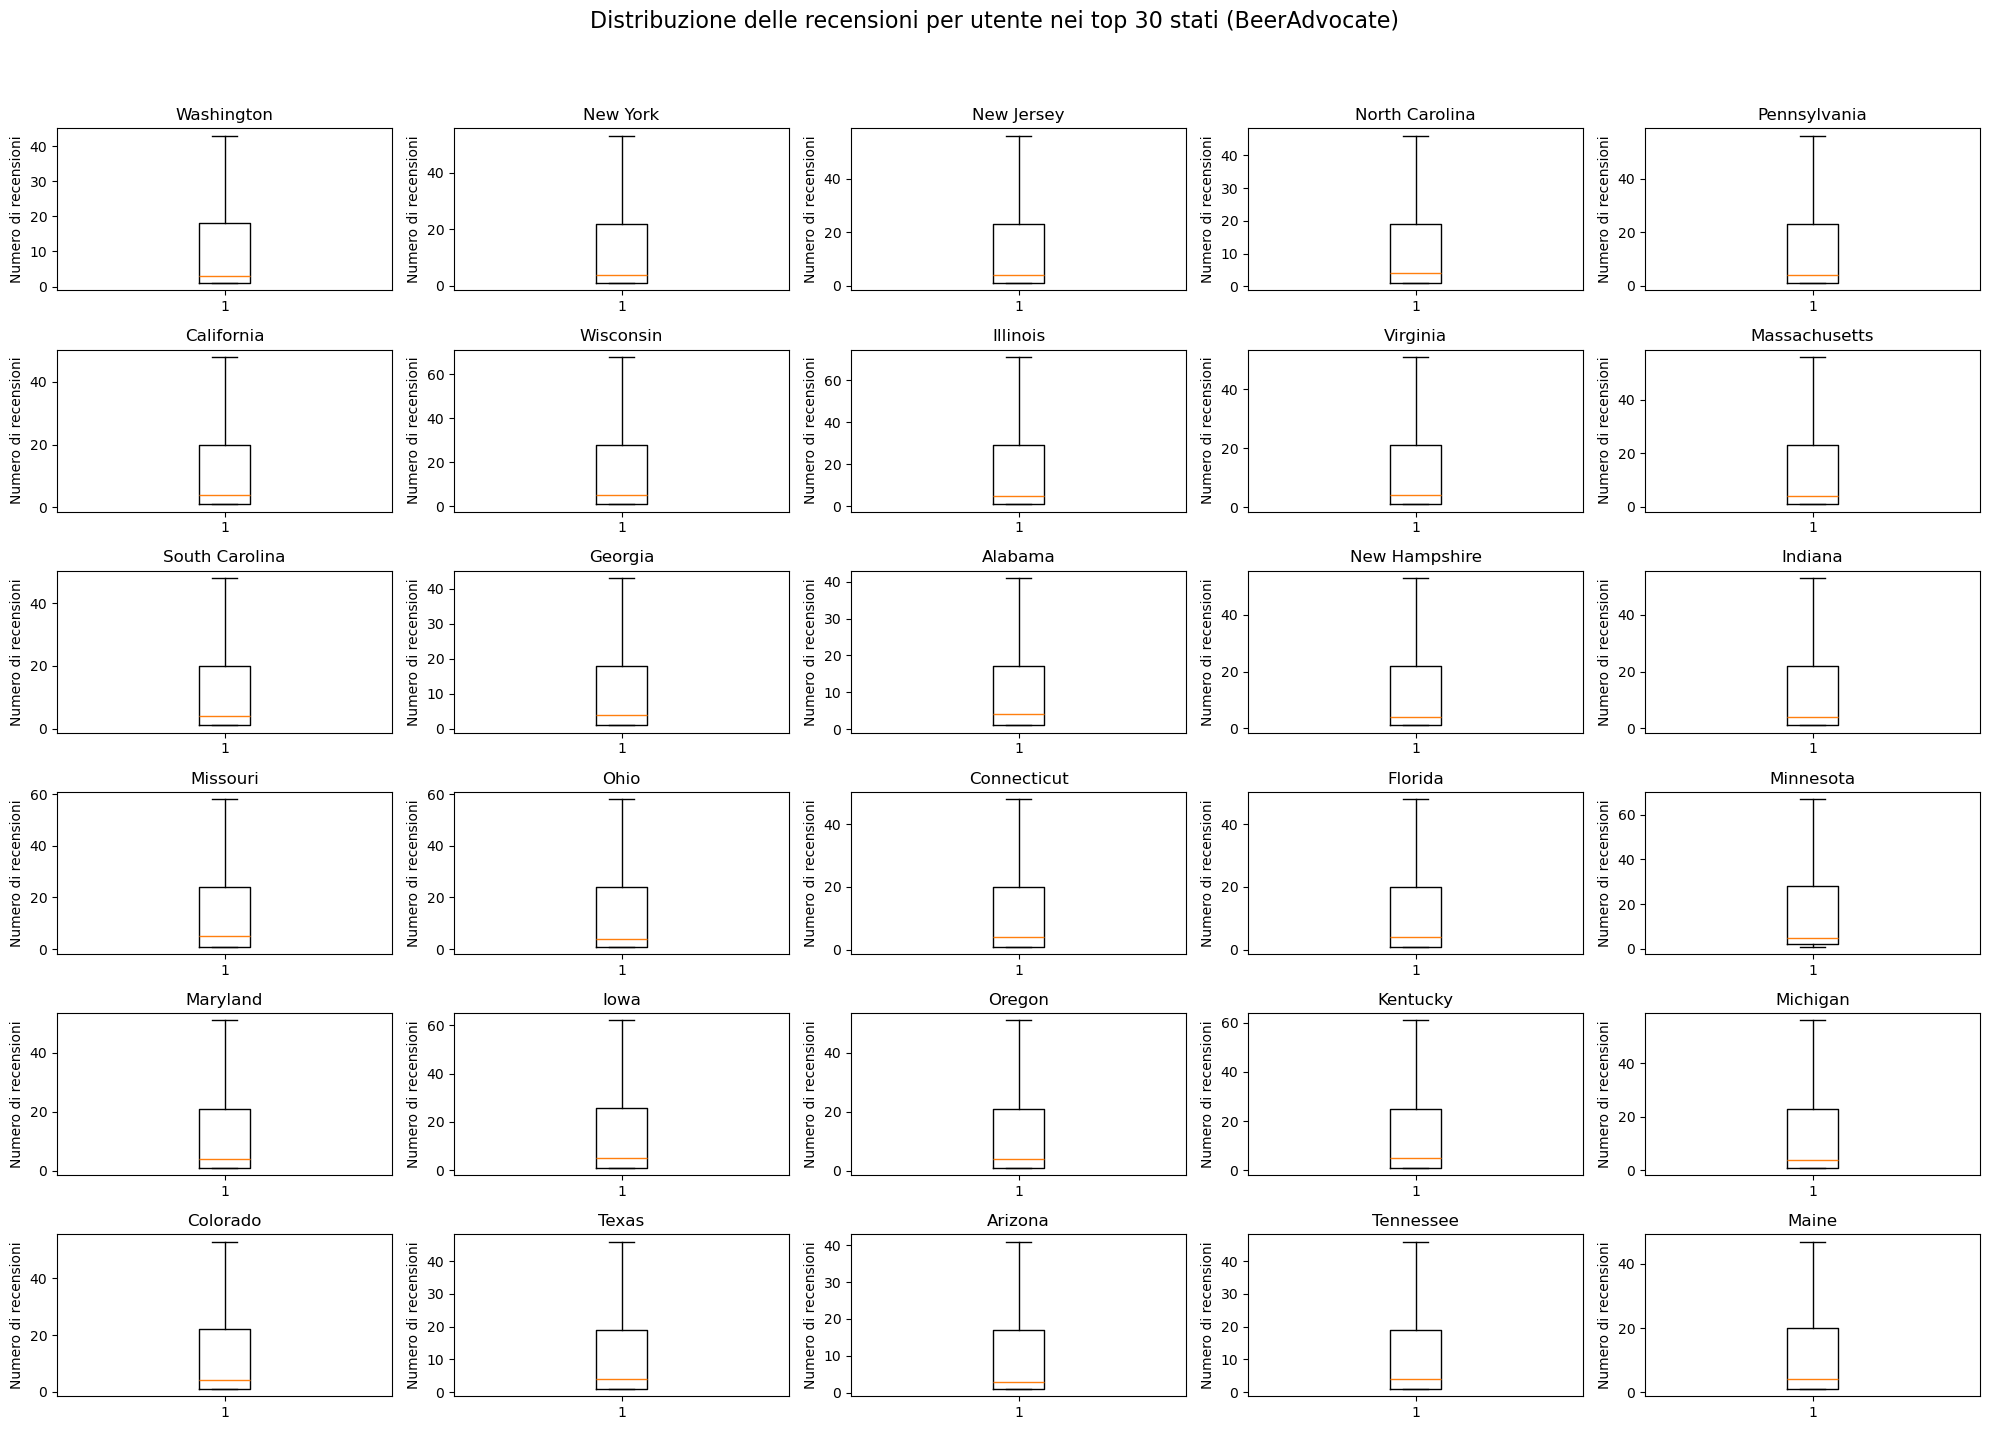

In [154]:
import matplotlib.pyplot as plt
import pandas as pd

# Supponiamo che `users_RB` e `users_BA` siano già stati caricati e preparati
# Eseguiamo la selezione dei top 30 stati per numero di recensioni

# Per RateBeer
top_states_RB = users_RB.groupby('state')['nbr_ratings'].count().nlargest(30).index
filtered_RB = users_RB[users_RB['state'].isin(top_states_RB)]

# Per BeerAdvocate
top_states_BA = users_BA.groupby('state')['nbr_ratings'].count().nlargest(30).index
filtered_BA = users_BA[users_BA['state'].isin(top_states_BA)]

# Funzione per creare subplot 6x5 per un sito
def plot_boxplots(data, title):
    fig, axes = plt.subplots(6, 5, figsize=(20, 15))
    axes = axes.flatten()
    
    for i, state in enumerate(data['state'].unique()):
        subset = data[data['state'] == state]
        axes[i].boxplot(subset['nbr_ratings'], showfliers=False)
        axes[i].set_title(state)
        axes[i].set_ylabel('Numero di recensioni')
    
    # Rimuovi eventuali assi non utilizzati
    for j in range(len(data['state'].unique()), len(axes)):
        fig.delaxes(axes[j])
        
    plt.suptitle(title, fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Creazione dei box plot per RateBeer
plot_boxplots(filtered_RB, 'Distribuzione delle recensioni per utente nei top 30 stati (RateBeer)')

# Creazione dei box plot per BeerAdvocate
plot_boxplots(filtered_BA, 'Distribuzione delle recensioni per utente nei top 30 stati (BeerAdvocate)')

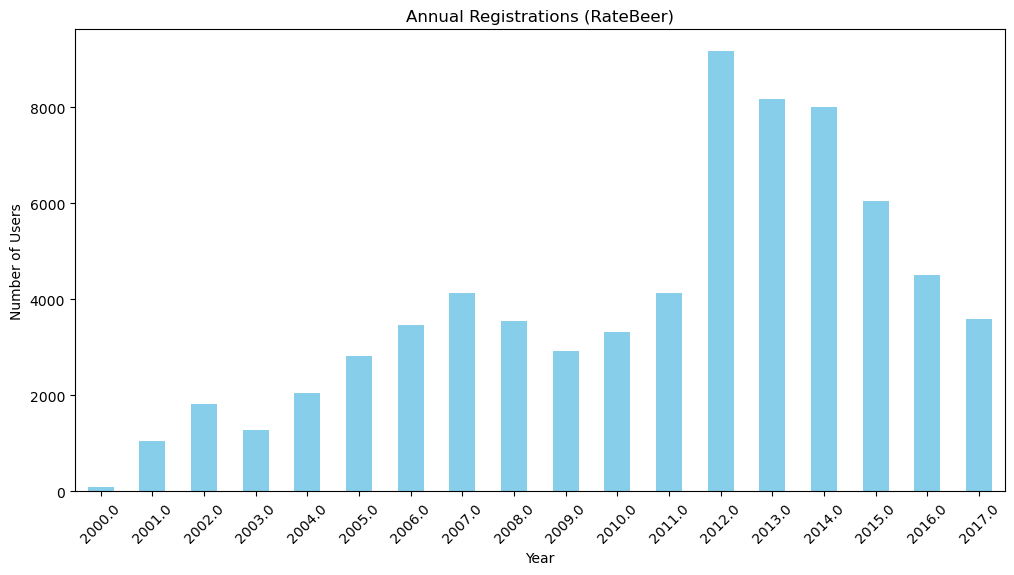

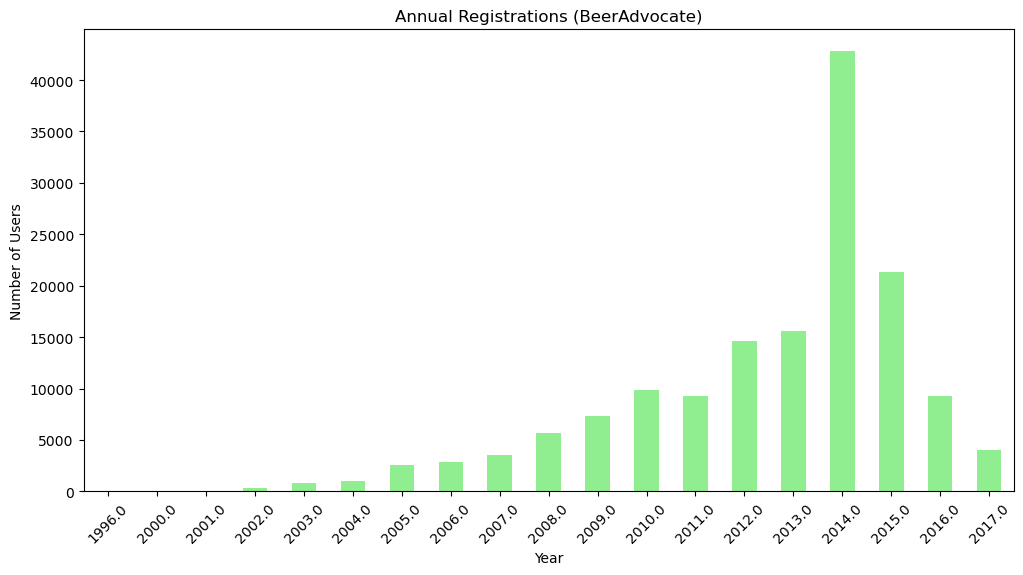

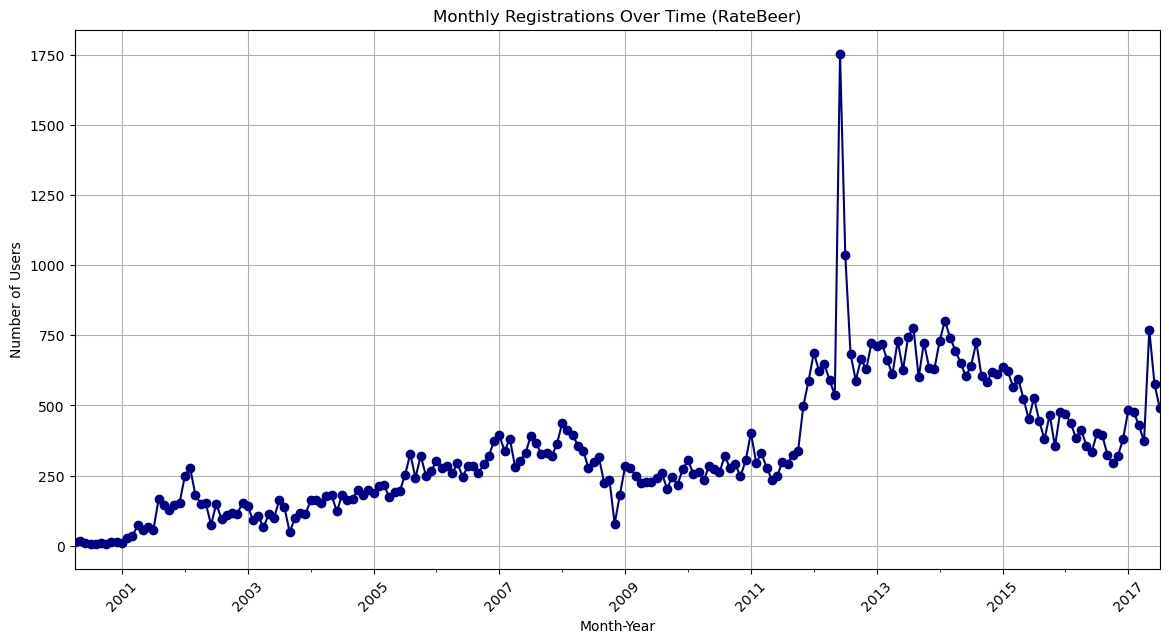

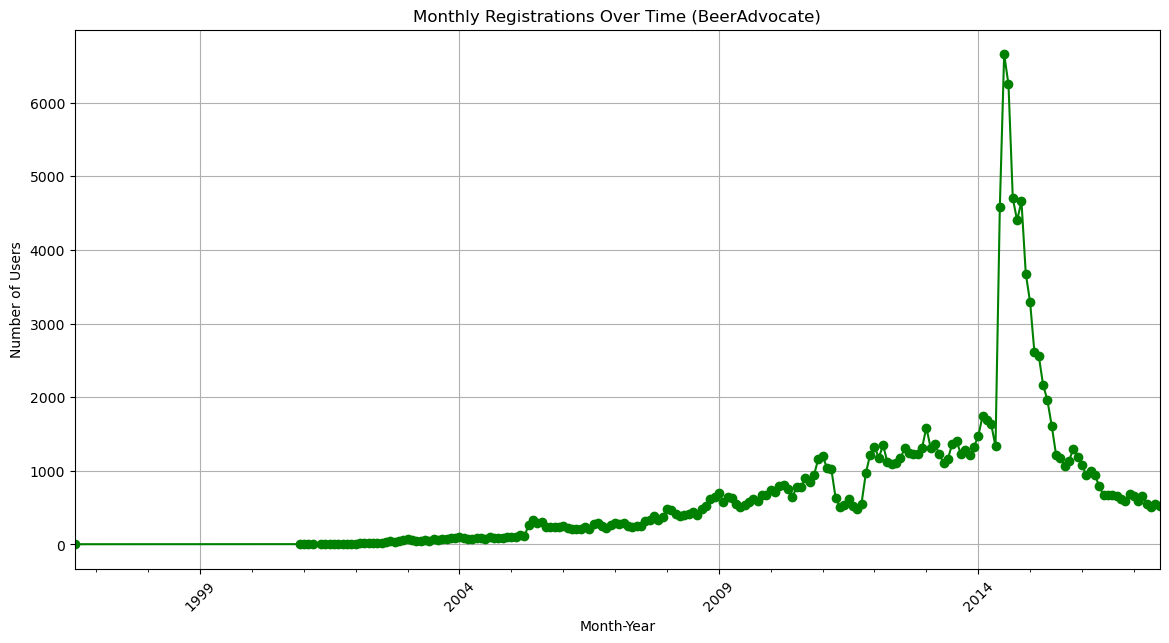

In [188]:
# Conversione della colonna 'joined' in una data leggibile
users_RB['joined_date'] = pd.to_datetime(users_RB['joined'], unit='s')
users_BA['joined_date'] = pd.to_datetime(users_BA['joined'], unit='s')

users_RB['joined_year'] = users_RB['joined_date'].dt.year
users_RB['joined_month'] = users_RB['joined_date'].dt.to_period('M')
users_BA['joined_year'] = users_BA['joined_date'].dt.year
users_BA['joined_month'] = users_BA['joined_date'].dt.to_period('M')

# Plot annual registrations (RateBeer)
plt.figure(figsize=(12, 6))
users_RB['joined_year'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Annual Registrations (RateBeer)')
plt.xlabel('Year')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.show()

# Plot annual registrations (BeerAdvocate)
plt.figure(figsize=(12, 6))
users_BA['joined_year'].value_counts().sort_index().plot(kind='bar', color='lightgreen')
plt.title('Annual Registrations (BeerAdvocate)')
plt.xlabel('Year')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.show()

# Monthly registrations (RateBeer)
plt.figure(figsize=(14, 7))
users_RB['joined_month'].value_counts().sort_index().plot(kind='line', marker='o', color='navy')
plt.title('Monthly Registrations Over Time (RateBeer)')
plt.xlabel('Month-Year')
plt.ylabel('Number of Users')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# Monthly registrations (BeerAdvocate)
plt.figure(figsize=(14, 7))
users_BA['joined_month'].value_counts().sort_index().plot(kind='line', marker='o', color='green')
plt.title('Monthly Registrations Over Time (BeerAdvocate)')
plt.xlabel('Month-Year')
plt.ylabel('Number of Users')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()



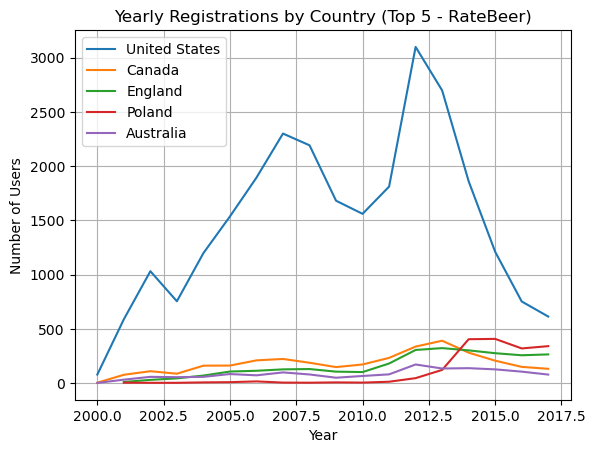

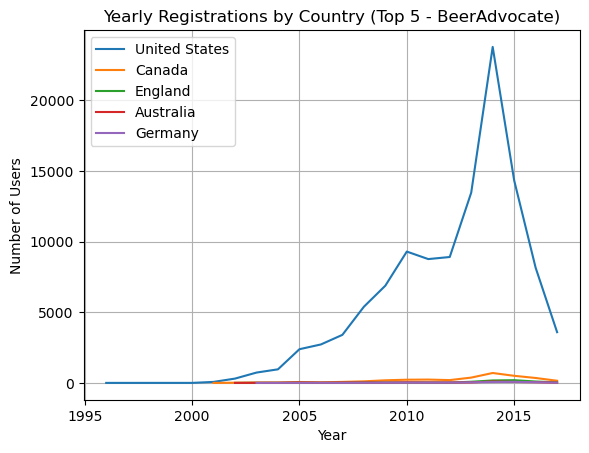

In [156]:
top_countries_RB = users_RB['location'].value_counts().head(5).index  # Top 5 countries for visibility
for country in top_countries_RB:
    country_data = users_RB[users_RB['location'] == country]
    country_data['joined_year'].value_counts().sort_index().plot(kind='line', label=country)

plt.title('Yearly Registrations by Country (Top 5 - RateBeer)')
plt.xlabel('Year')
plt.ylabel('Number of Users')
plt.legend()
plt.grid(True)
plt.show()

# Country comparison by registration year for BeerAdvocate
top_countries_BA = users_BA['location'].value_counts().head(5).index  # Top 5 countries for visibility
for country in top_countries_BA:
    country_data = users_BA[users_BA['location'] == country]
    country_data['joined_year'].value_counts().sort_index().plot(kind='line', label=country)

plt.title('Yearly Registrations by Country (Top 5 - BeerAdvocate)')
plt.xlabel('Year')
plt.ylabel('Number of Users')
plt.legend()
plt.grid(True)
plt.show()

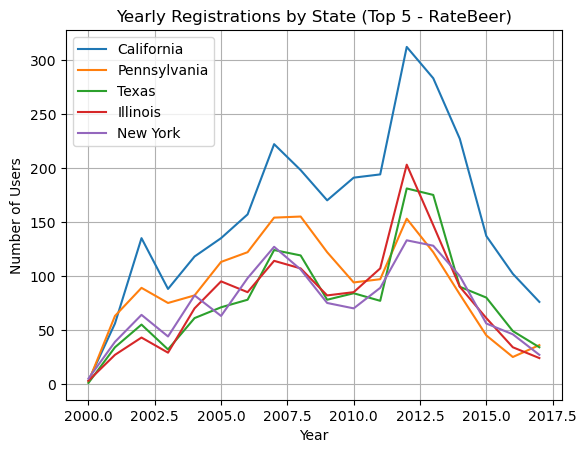

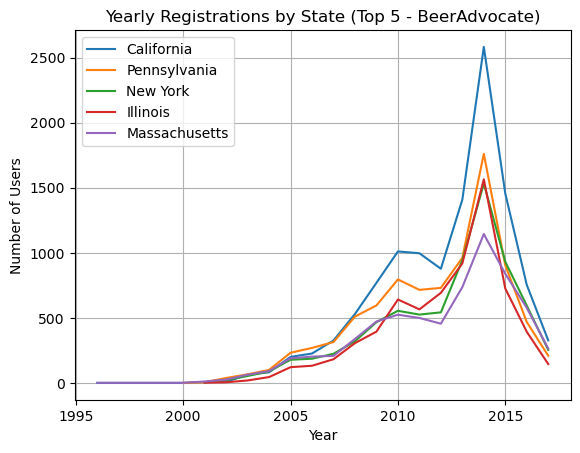

In [164]:
top_countries_RB = users_RB['state'].value_counts().head(5).index  # Top 5 countries for visibility
for country in top_countries_RB:
    country_data = users_RB[users_RB['state'] == country]
    country_data['joined_year'].value_counts().sort_index().plot(kind='line', label=country)

plt.title('Yearly Registrations by State (Top 5 - RateBeer)')
plt.xlabel('Year')
plt.ylabel('Number of Users')
plt.legend()
plt.grid(True)
plt.show()

# Country comparison by registration year for BeerAdvocate
top_countries_BA = users_BA['state'].value_counts().head(5).index  # Top 5 countries for visibility
for country in top_countries_BA:
    country_data = users_BA[users_BA['state'] == country]
    country_data['joined_year'].value_counts().sort_index().plot(kind='line', label=country)

plt.title('Yearly Registrations by State (Top 5 - BeerAdvocate)')
plt.xlabel('Year')
plt.ylabel('Number of Users')
plt.legend()
plt.grid(True)
plt.show()

Correlation between registration year and number of reviews (RateBeer): -0.10626066002265569
Correlation between registration year and number of reviews (BeerAdvocate): -0.1436203137819017


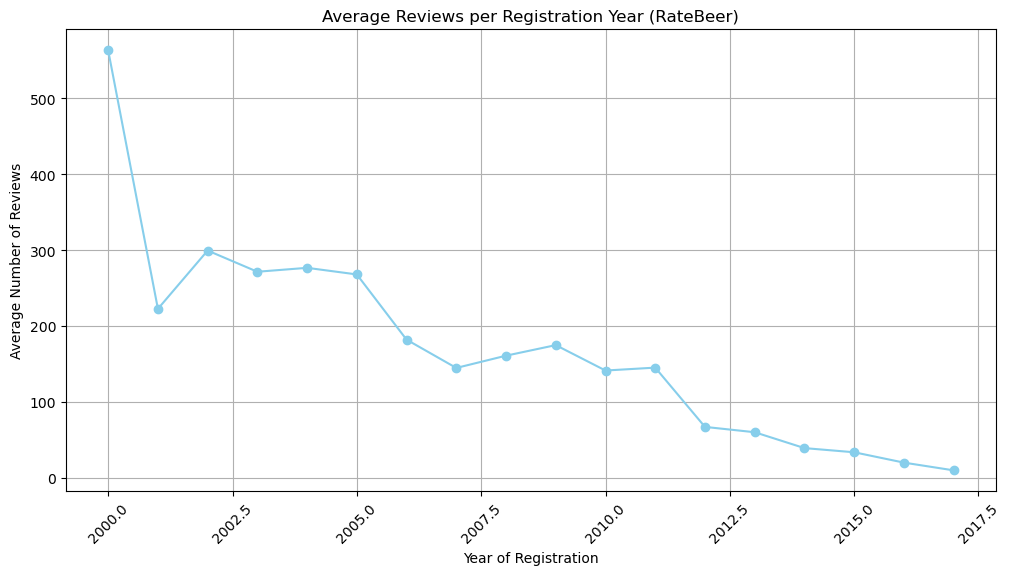

    joined_year  nbr_ratings
0        1996.0  2729.666667
1        2000.0    37.500000
2        2001.0   339.217949
3        2002.0   336.721893
4        2003.0   228.306431
5        2004.0   170.672745
6        2005.0   121.142302
7        2006.0   111.069979
8        2007.0   105.265660
9        2008.0    94.774947
10       2009.0    86.130023
11       2010.0    80.872146
12       2011.0    76.359811
13       2012.0    75.512623
14       2013.0    71.827639
15       2014.0    25.096006
16       2015.0    18.806867
17       2016.0    13.455562
18       2017.0     7.887590


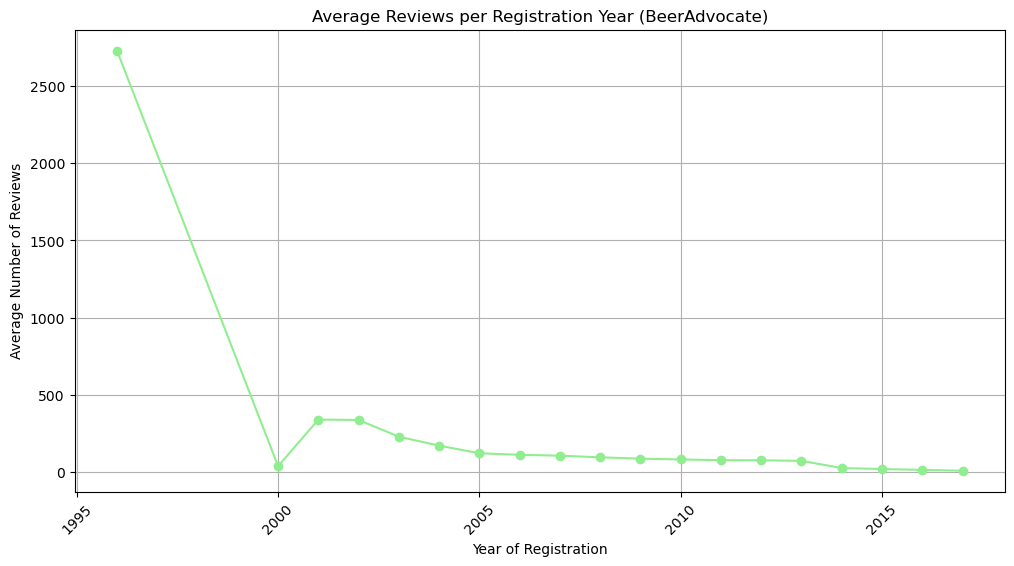

In [172]:
correlation_RB = users_RB['joined_year'].corr(users_RB['nbr_ratings'])
print(f'Correlation between registration year and number of reviews (RateBeer): {correlation_RB}')

# Correlation Analysis (BeerAdvocate)
correlation_BA = users_BA['joined_year'].corr(users_BA['nbr_ratings'])
print(f'Correlation between registration year and number of reviews (BeerAdvocate): {correlation_BA}')
average_reviews_RB = users_RB.groupby('joined_year')['nbr_ratings'].mean().reset_index()

# Plot average reviews per registration year (RateBeer)
plt.figure(figsize=(12, 6))
plt.plot(average_reviews_RB['joined_year'], average_reviews_RB['nbr_ratings'], marker='o', color='skyblue')
plt.title('Average Reviews per Registration Year (RateBeer)')
plt.xlabel('Year of Registration')
plt.ylabel('Average Number of Reviews')
plt.grid()
plt.xticks(rotation=45)
plt.show()

# Average reviews per registration year (BeerAdvocate)
average_reviews_BA = users_BA.groupby('joined_year')['nbr_ratings'].mean().reset_index()
print(average_reviews_BA)
# Plot average reviews per registration year (BeerAdvocate)
plt.figure(figsize=(12, 6))
plt.plot(average_reviews_BA['joined_year'], average_reviews_BA['nbr_ratings'], marker='o', color='lightgreen')
plt.title('Average Reviews per Registration Year (BeerAdvocate)')
plt.xlabel('Year of Registration')
plt.ylabel('Average Number of Reviews')
plt.grid()
plt.xticks(rotation=45)
plt.show()

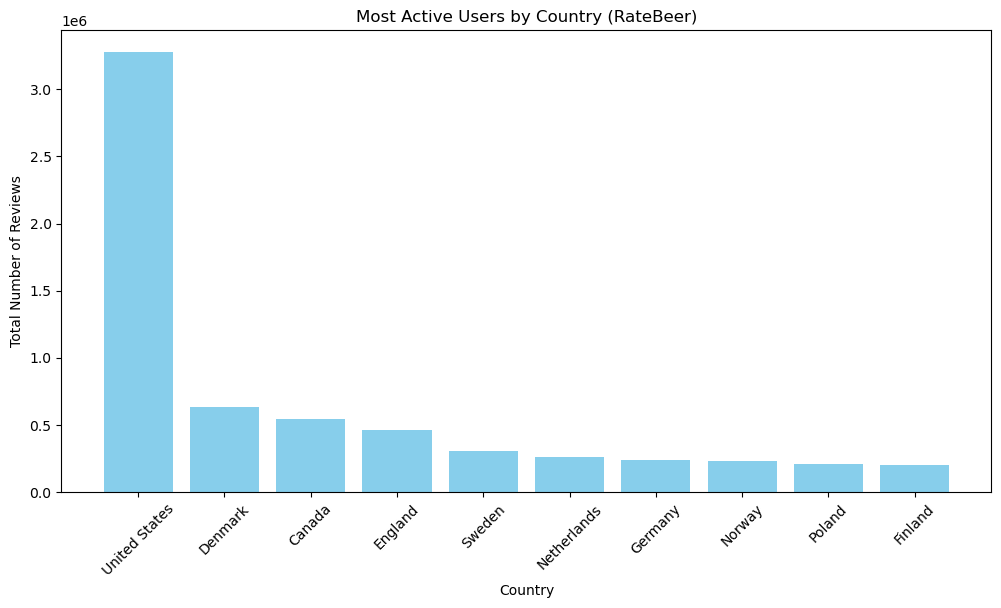

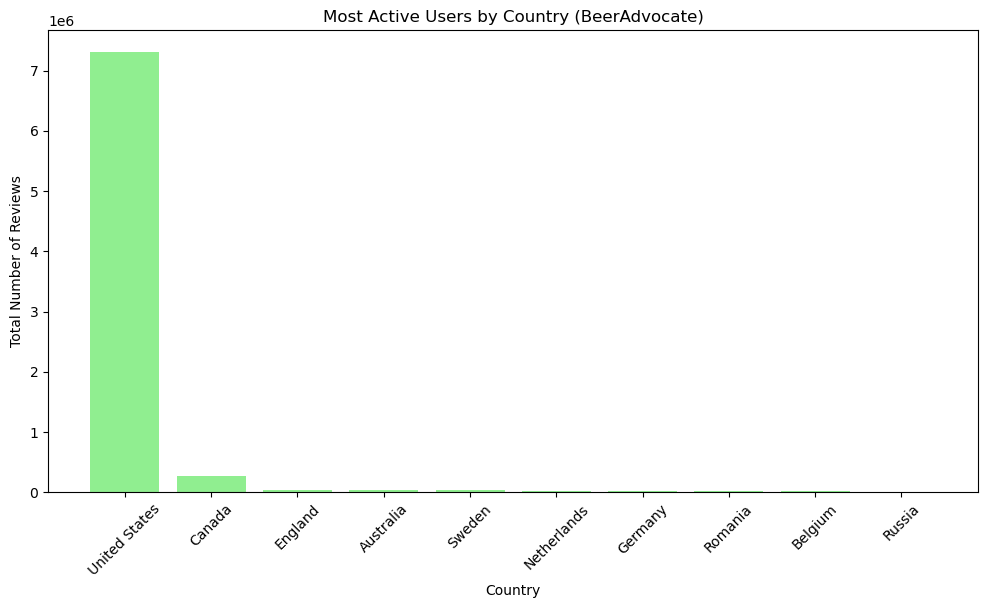

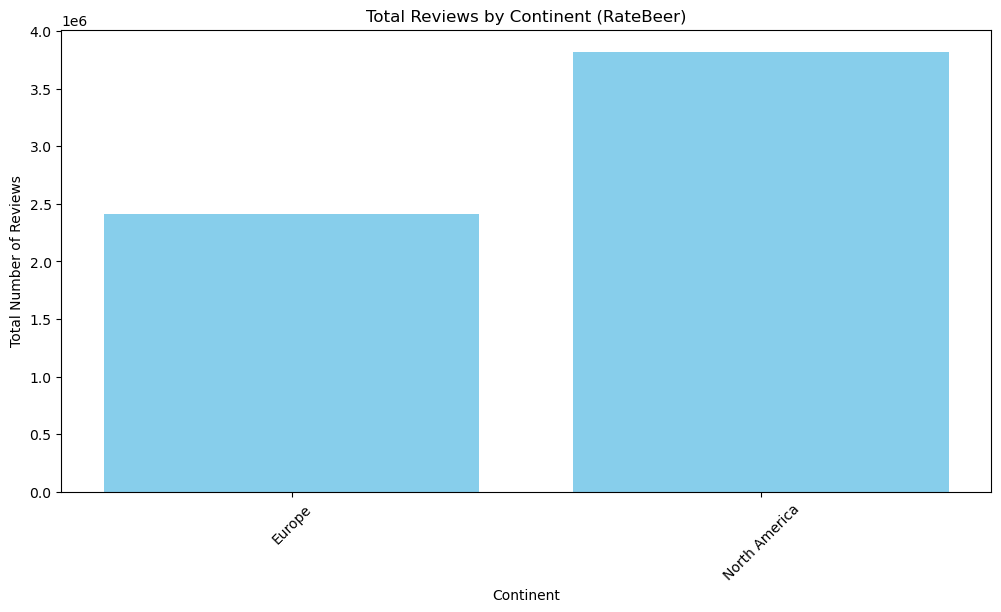

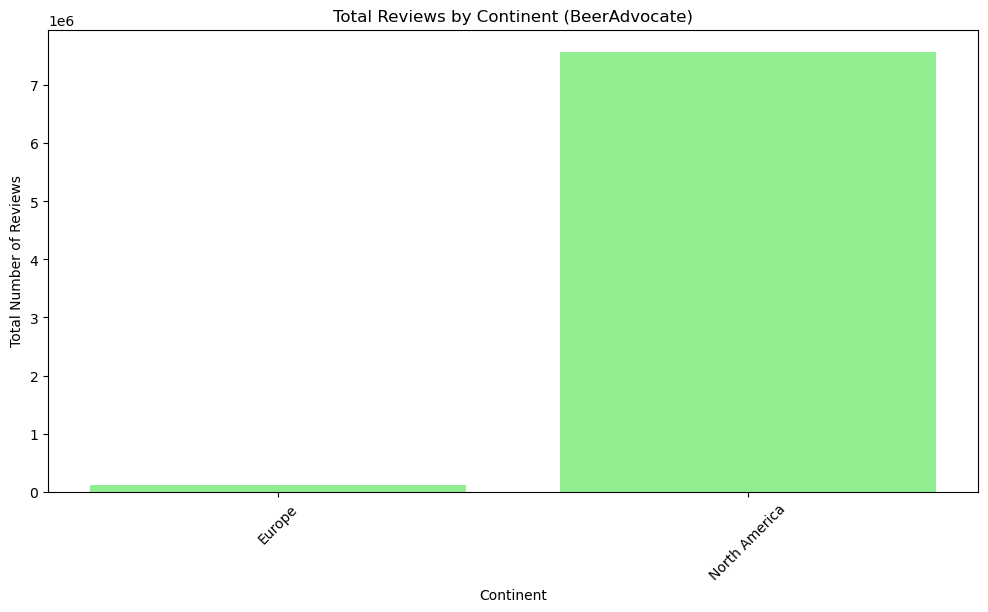

In [202]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets (assuming you have users_RB and users_BA prepared)
# users_RB = pd.read_csv('path_to_users_RB.csv')
# users_BA = pd.read_csv('path_to_users_BA.csv')

# Step 1: Most Active Users by Country (RateBeer)
active_users_RB = users_RB.groupby('location')['nbr_ratings'].sum().reset_index()
active_users_RB = active_users_RB.sort_values(by='nbr_ratings', ascending=False)

# Plot the most active users by country (RateBeer)
plt.figure(figsize=(12, 6))
plt.bar(active_users_RB['location'][:10], active_users_RB['nbr_ratings'][:10], color='skyblue')
plt.title('Most Active Users by Country (RateBeer)')
plt.xlabel('Country')
plt.ylabel('Total Number of Reviews')
plt.xticks(rotation=45)
plt.show()

# Step 1: Most Active Users by Country (BeerAdvocate)
active_users_BA = users_BA.groupby('location')['nbr_ratings'].sum().reset_index()
active_users_BA = active_users_BA.sort_values(by='nbr_ratings', ascending=False)

# Plot the most active users by country (BeerAdvocate)
plt.figure(figsize=(12, 6))
plt.bar(active_users_BA['location'][:10], active_users_BA['nbr_ratings'][:10], color='lightgreen')
plt.title('Most Active Users by Country (BeerAdvocate)')
plt.xlabel('Country')
plt.ylabel('Total Number of Reviews')
plt.xticks(rotation=45)
plt.show()

# Step 3: Comparison by Continents
# Assuming you have a mapping of countries to continents
country_to_continent = {
    'United States': 'North America',
    'Canada': 'North America',
    'Germany': 'Europe',
    'Poland': 'Europe',
    'Spain': 'Europe',
    'Italy': 'Europe',
    'England': 'Europe',
    'Denmark': 'Europe',
    'Sweden': 'Europe',
    'Netherland': 'Europe',
    'Norway': 'Europe',
    'Finland': 'Europe'
    # Add other countries and their respective continents
}

# Map the location to continents for RateBeer
users_RB['continent'] = users_RB['location'].map(country_to_continent)
reviews_by_continent_RB = users_RB.groupby('continent')['nbr_ratings'].sum().reset_index()

# Plot comparison by continent (RateBeer)
plt.figure(figsize=(12, 6))
plt.bar(reviews_by_continent_RB['continent'], reviews_by_continent_RB['nbr_ratings'], color='skyblue')
plt.title('Total Reviews by Continent (RateBeer)')
plt.xlabel('Continent')
plt.ylabel('Total Number of Reviews')
plt.xticks(rotation=45)
plt.show()

# Map the location to continents for BeerAdvocate
users_BA['continent'] = users_BA['location'].map(country_to_continent)
reviews_by_continent_BA = users_BA.groupby('continent')['nbr_ratings'].sum().reset_index()

# Plot comparison by continent (BeerAdvocate)
plt.figure(figsize=(12, 6))
plt.bar(reviews_by_continent_BA['continent'], reviews_by_continent_BA['nbr_ratings'], color='lightgreen')
plt.title('Total Reviews by Continent (BeerAdvocate)')
plt.xlabel('Continent')
plt.ylabel('Total Number of Reviews')
plt.xticks(rotation=45)
plt.show()


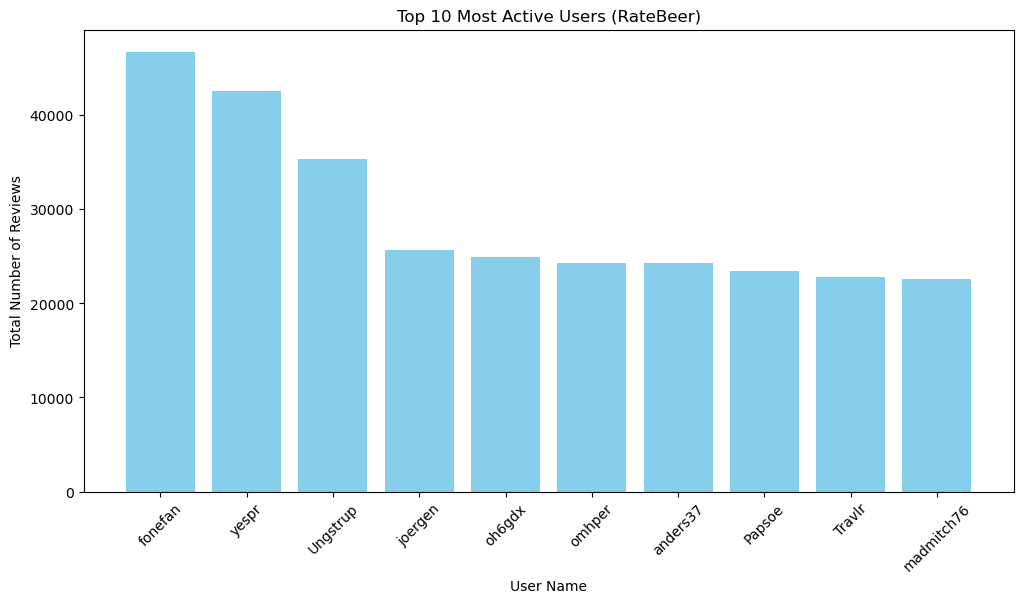

Top 10 Most Active Users (RateBeer):
        user_name       location  nbr_ratings
31639     fonefan        Denmark        46749
50256       yespr        Denmark        42567
21505    Ungstrup        Denmark        35316
35688     joergen        Denmark        25701
41743      oh6gdx        Finland        24966
41877      omhper         Sweden        24319
23574    anders37         Sweden        24315
16058      Papsoe        Denmark        23458
21165      Travlr  United States        22799
38553  madmitch76        England        22640


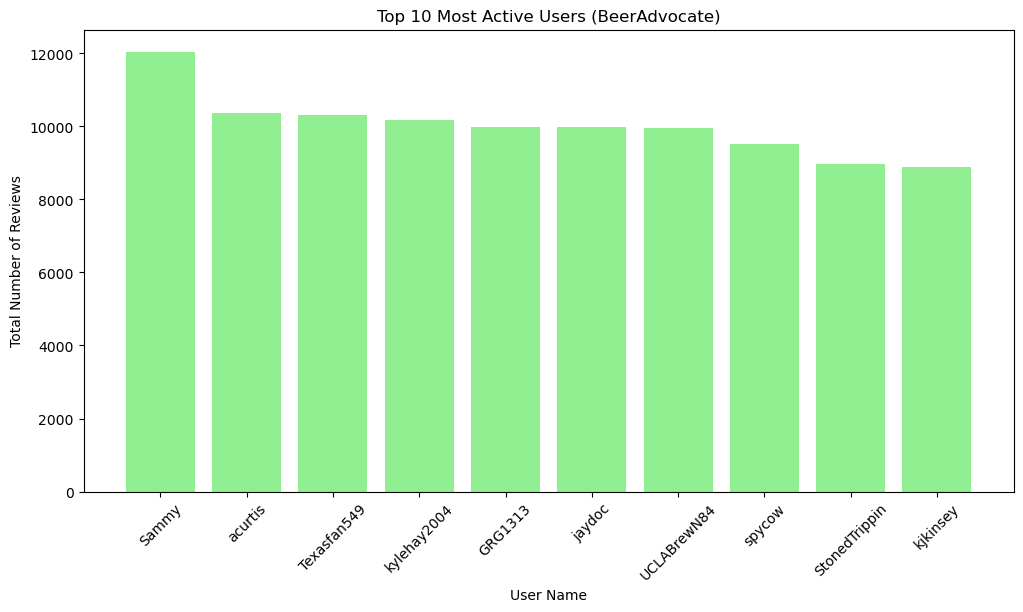

Top 10 Most Active Users (BeerAdvocate):
            user_name       location  nbr_ratings
53158           Sammy         Canada        12046
66575         acurtis  United States        10360
59499     Texasfan549  United States        10302
96738     kylehay2004  United States        10180
23054         GRG1313  United States         9991
90547          jaydoc  United States         9987
62684     UCLABrewN84  United States         9944
114248         spycow  United States         9520
57508   StonedTrippin  United States         8970
95926        kjkinsey  United States         8898


/var/folders/np/3hhzvb2x6znbzvj6ph2phb8h0000gn/T/ipykernel_76358/3701333918.py:41: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([users_RB[users_RB['user_name'] == user]['nbr_ratings'] for user in top_users_RB['user_name']],


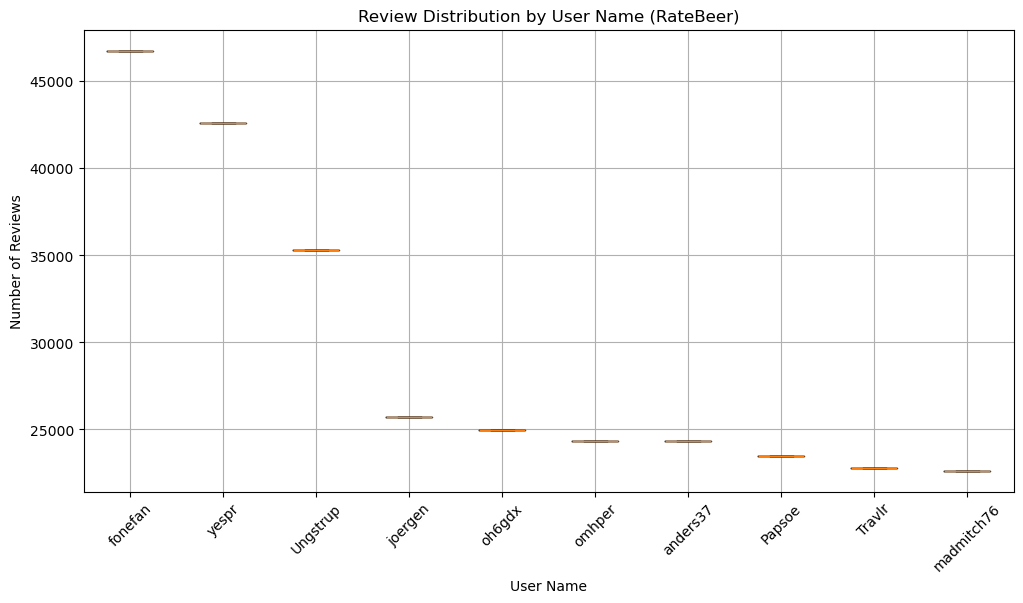

/var/folders/np/3hhzvb2x6znbzvj6ph2phb8h0000gn/T/ipykernel_76358/3701333918.py:52: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([users_BA[users_BA['user_name'] == user]['nbr_ratings'] for user in top_users_BA['user_name']],


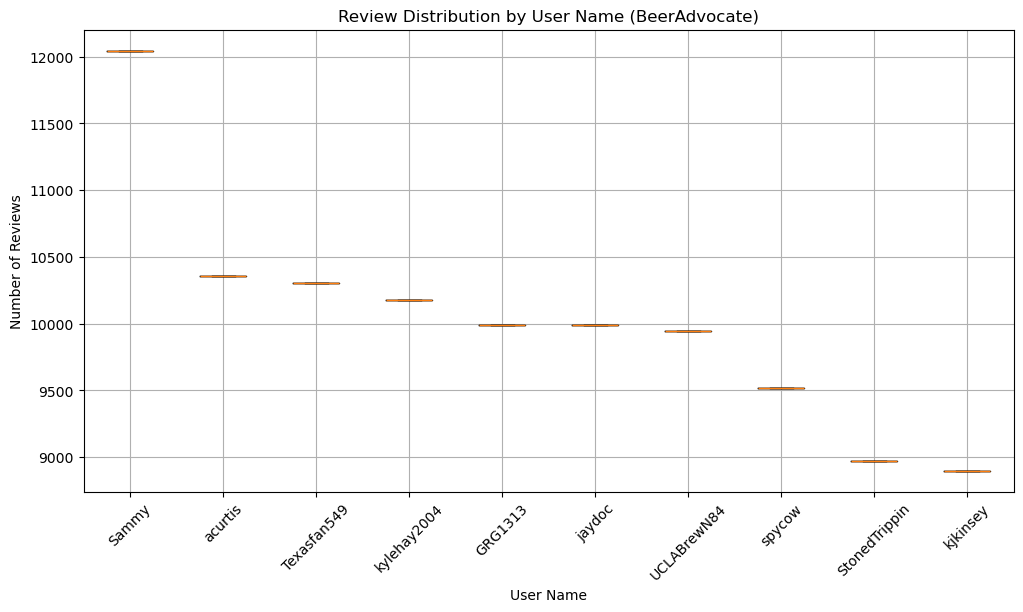

In [196]:
# Step 1: Top 10 Most Active Users (RateBeer)
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Top 10 Most Active Users (RateBeer)
top_users_RB = users_RB.groupby(['user_name', 'location'])['nbr_ratings'].sum().reset_index()
top_users_RB = top_users_RB.sort_values(by='nbr_ratings', ascending=False).head(10)

# Plotting the top 10 most active users (RateBeer)
plt.figure(figsize=(12, 6))
plt.bar(top_users_RB['user_name'], top_users_RB['nbr_ratings'], color='skyblue')
plt.title('Top 10 Most Active Users (RateBeer)')
plt.xlabel('User Name')
plt.ylabel('Total Number of Reviews')
plt.xticks(rotation=45)
plt.show()

# Analyze statistics of top users
print("Top 10 Most Active Users (RateBeer):")
print(top_users_RB)

# Step 1: Top 10 Most Active Users (BeerAdvocate)
top_users_BA = users_BA.groupby(['user_name', 'location'])['nbr_ratings'].sum().reset_index()
top_users_BA = top_users_BA.sort_values(by='nbr_ratings', ascending=False).head(10)

# Plotting the top 10 most active users (BeerAdvocate)
plt.figure(figsize=(12, 6))
plt.bar(top_users_BA['user_name'], top_users_BA['nbr_ratings'], color='lightgreen')
plt.title('Top 10 Most Active Users (BeerAdvocate)')
plt.xlabel('User Name')
plt.ylabel('Total Number of Reviews')
plt.xticks(rotation=45)
plt.show()

# Analyze statistics of top users
print("Top 10 Most Active Users (BeerAdvocate):")
print(top_users_BA)

# Step 2: Review Distribution by Username (RateBeer)
plt.figure(figsize=(12, 6))
plt.boxplot([users_RB[users_RB['user_name'] == user]['nbr_ratings'] for user in top_users_RB['user_name']],
            labels=top_users_RB['user_name'])
plt.title('Review Distribution by User Name (RateBeer)')
plt.xlabel('User Name')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.grid()
plt.show()

# Step 2: Review Distribution by Username (BeerAdvocate)
plt.figure(figsize=(12, 6))
plt.boxplot([users_BA[users_BA['user_name'] == user]['nbr_ratings'] for user in top_users_BA['user_name']],
            labels=top_users_BA['user_name'])
plt.title('Review Distribution by User Name (BeerAdvocate)')
plt.xlabel('User Name')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.grid()
plt.show()



In [198]:
# Correlation matrix for RateBeer
correlation_RB = users_RB.corr()
print("RateBeer - Correlation Matrix:")
print(correlation_RB)

# Heatmap of correlation for RateBeer
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_RB, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlazione (RateBeer)')
plt.show()

# Correlation matrix for BeerAdvocate
correlation_BA = users_BA.corr()
print("BeerAdvocate - Correlation Matrix:")
print(correlation_BA)

# Heatmap of correlation for BeerAdvocate
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_BA, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlazione (BeerAdvocate)')
plt.show()


ValueError: could not convert string to float: 'Manslow'